# Exploratory Data Analysis (EDA)

## Introduction

The Exploratory Data Analysis (EDA) phase is a crucial step in our Data Science project aimed at predicting election results and understanding voter behavior using the PREP (INE) database. In this phase, we will delve into the dataset to uncover patterns, spot anomalies, test hypotheses, and check assumptions with the help of summary statistics and graphical representations.

The primary goal of EDA is to gain a deeper understanding of the data, which will guide us in making informed decisions during the modeling phase. This involves identifying key features that influence voter decisions and understanding the underlying structure of the data. By doing so, we can develop strategies for the opposition (PAN-PRI-PRD) to enhance their chances in upcoming election cycles.

## Objectives

- **Data Exploration:** Understand the distribution and structure of the data, identify missing values, and detect outliers.
- **Feature Analysis:** Examine the relationships between different features and the target variable to identify potential predictors.
- **Pattern Recognition:** Identify trends and patterns that may influence voter behavior and election outcomes.
- **Data Visualization:** Use graphical representations to visualize the data, making it easier to communicate findings and insights.
- **Hypothesis Testing:** Formulate and test hypotheses to understand the factors contributing to the opposition's significant loss in the 2024 elections and the winning party's success.

By thoroughly exploring the data, we aim to build a robust predictive model that can provide actionable insights for the opposition, enabling them to develop effective campaign strategies and allocate resources efficiently for future elections.


In [2]:
#Import necessary packages and load dataset
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
df= pd.read_csv('ELECTIONS_vs_SOCIODEMOGRAPHICS_ALT2.csv')

In [53]:
#Import Geopandas, unicode and mpatches to load the Map visualization at the end of this EDA
import geopandas as gpd
from unidecode import unidecode
import matplotlib.patches as mpatches

In [ ]:
#

Lets recap what is the shape and contents of our votations dataframe


In [3]:
# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
df.head()

First few rows of the dataframe:


ENTIDAD  COMPETITOR_Votes_2024  Xochitl_Opposition_Votes  \
0       AGUASCALIENTES                 270389                    294746   
1      BAJA CALIFORNIA                 862661                    290698   
2  BAJA CALIFORNIA SUR                 175755                     90838   
3             CAMPECHE                 240693                     62268   
4              CHIAPAS                1519559                    355592   

   Maynez_Independant_Votes  Null_Votes  Urban_Polling_Stations  \
0                     57054       14144                    1279   
1                    132914       30287                    4671   
2                     26581        6443                     827   
3                     82898        9346                     734   
4                    162166       94634                    2519   

   Non_Urban_Polling_Stations  AMLO_2018  GDP_1988  GDP_1994  ...  \
0                         563     190820     86482    121684  ...   
1                         703     675810    417816    548270  ...   
2                         287     136806     62347     75145  ...   
3                         496     171328    588026    713799  ...   
4                        4354    1106665    230322    281577  ...   

   Public_Hospital_Users  Total_Vehicles  Catholic_Believers  Murders_Yr  \
0                1153954          721372             1159832          88   
1                2783913         2208801             2187369        2925   
2                 666840          587090              544008          90   
3                 721266          372668              515526         110   
4                3677747         6368520             2704411         503   

   Median_Age  Children  Teenagers   Adults   Elders  Total_Population  
0          27    256986     261684   761561   145376           1425607  
1          30    574174     627987  2187557   379302           3769020  
2          29    133230     133134   456475    75608            798447  
3          29    165244     156308   504195   102616            928363  
4          24   1053437    1259351  5405537  1491619           9209944  

[5 rows x 36 columns]

### Sanity Check
During Data wrangling I did a thorough check of missing values, NaNs, etc. I also searched for duplicate values and Correct Dtype identification. However lets do a quick double check

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   ENTIDAD                        32 non-null     object
 1   COMPETITOR_Votes_2024          32 non-null     int64 
 2   Xochitl_Opposition_Votes       32 non-null     int64 
 3   Maynez_Independant_Votes       32 non-null     int64 
 4   Null_Votes                     32 non-null     int64 
 5   Urban_Polling_Stations         32 non-null     int64 
 6   Non_Urban_Polling_Stations     32 non-null     int64 
 7   AMLO_2018                      32 non-null     int64 
 8   GDP_1988                       32 non-null     int64 
 9   GDP_1994                       32 non-null     int64 
 10  GDP_2000                       32 non-null     int64 
 11  GDP_2006                       32 non-null     int64 
 12  GDP_2012                       32 non-null     int64 
 13  GDP_201

In [5]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())



Missing values:
ENTIDAD                          0
COMPETITOR_Votes_2024            0
Xochitl_Opposition_Votes         0
Maynez_Independant_Votes         0
Null_Votes                       0
Urban_Polling_Stations           0
Non_Urban_Polling_Stations       0
AMLO_2018                        0
GDP_1988                         0
GDP_1994                         0
GDP_2000                         0
GDP_2006                         0
GDP_2012                         0
GDP_2018                         0
GDP_2024                         0
Federal_Social_Welfare_Budget    0
Welfare_Recipents                0
Sheinbaum_MORENA_Events          0
Xochitl_Opposition_Events        0
Maynez_Independant_Events        0
Average_Schooling_Years          0
Avg_Income_Yr                    0
Avg_Expense_Yr                   0
Extreme_Poberty_habitants        0
Poberty_Habitants                0
Private_Hospital_Users           0
Public_Hospital_Users            0
Total_Vehicles                   0
Cat

No missing values, all my variables are numerical except from ENTIDAD (Identificator Categorical Variable)

Lets check distributions of all my variables:


Distribution of numeric features:


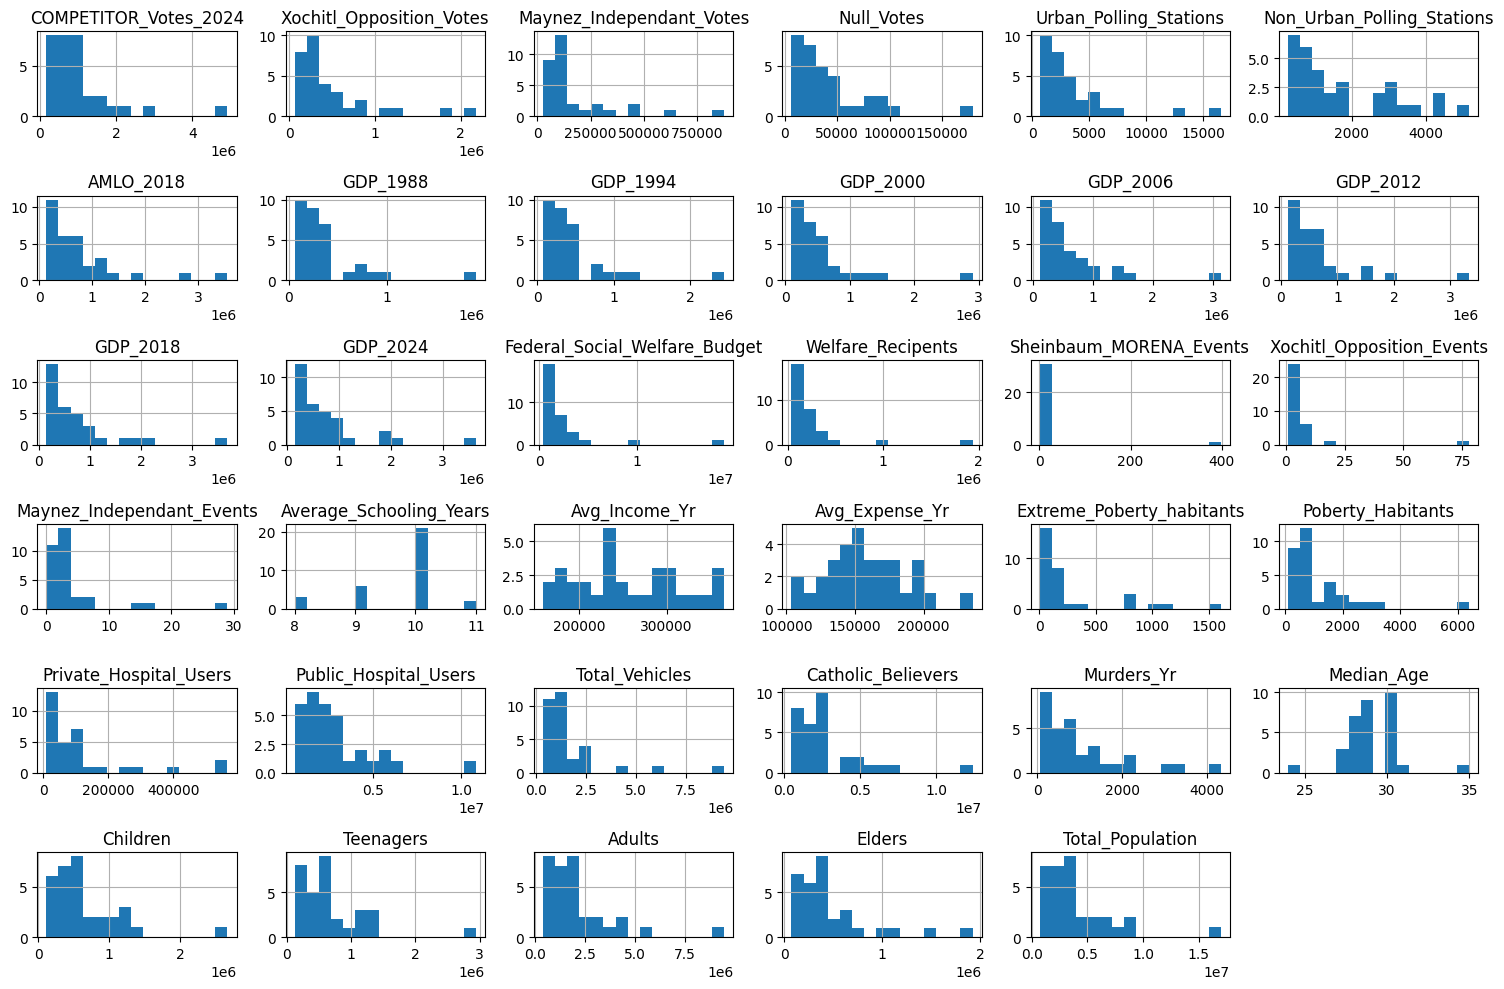

In [6]:
# Distribution of numeric features
print("\nDistribution of numeric features:")
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

Most of them are not normal trends, so I might need to use permutation Hypothesis testing rather than T-student or Z-score tests!

### GDP Data

Our Prediction Variable is "Competitor Votes" which represents Claudia Sheinbaum, so i will ignore fora while Xochitl and Maynez votes to focus only in 1 dependant variable.

I will also eliminate the GDP from 1982 to 2012, so that I can focus only in the years 2018, 2024 where MORENA Competitor parti started operations.


In [7]:
eliminate= ["GDP_1988", "GDP_1994", "GDP_2000", "GDP_2006", "GDP_2012", 'Xochitl_Opposition_Votes', 'Maynez_Independant_Votes']
simplified_df= df.drop(columns= eliminate)

I will eliminate GDP Data before 2024 to reduce my model complexity. Before completly scraping this GDP $ data, I would just like to visualize the trends of economical behavior of the original df per state and also per country to see if I can catch any insight of how politics are ongoing since MORENA (Competitor politic party won the elections in 2018)

In [8]:
#First I create a filter of the columns I want to graph
GDP= ["ENTIDAD", "GDP_1988", "GDP_1994", "GDP_2000", "GDP_2006", "GDP_2012", 'GDP_2018', 'GDP_2024']	

#then I add all the rows of df dataframe that meet the GDP filter, to get a line plot of "Total Country GDP 1982-2024"
GDP_df= df[GDP]
GDP_df= GDP_df.T
GDP_df.head()

0                1                    2         3   \
ENTIDAD   AGUASCALIENTES  BAJA CALIFORNIA  BAJA CALIFORNIA SUR  CAMPECHE   
GDP_1988           86482           417816                62347    588026   
GDP_1994          121684           548270                75145    713799   
GDP_2000          158300           790647                95187    826278   
GDP_2006          200318           772687               126685    959641   

               4          5                 6         7       8        9   \
ENTIDAD   CHIAPAS  CHIHUAHUA  CIUDAD DE MEXICO  COAHUILA  COLIMA  DURANGO   
GDP_1988   230322     326595           1897079    387781   74614   149136   
GDP_1994   281577     417237           2448263    479740   90021   181317   
GDP_2000   309797     581264           2903709    655491  110551   208654   
GDP_2006   321114     635598           3134225    798549  114844   241373   

          ...            22               23       24      25       26  \
ENTIDAD   ...  QUINTANA ROO  SAN LUIS POTOSI  SINALOA  SONORA  TABASCO   
GDP_1988  ...        102517           201731   283923  329333   306786   
GDP_1994  ...        140495           264259   344144  446593   375022   
GDP_2000  ...        180224           310465   391567  591564   425907   
GDP_2006  ...        234333           377360   411251  605739   478125   

                  27        28        29       30         31  
ENTIDAD   TAMAULIPAS  TLAXCALA  VERACRUZ  YUCATAN  ZACATECAS  
GDP_1988      336905     69999    676136   145505      89469  
GDP_1994      419240     87365    837586   187127     112636  
GDP_2000      565665    112212    896917   232449     124587  
GDP_2006      657147    117236    992039   270590     159901  

[5 rows x 32 columns]

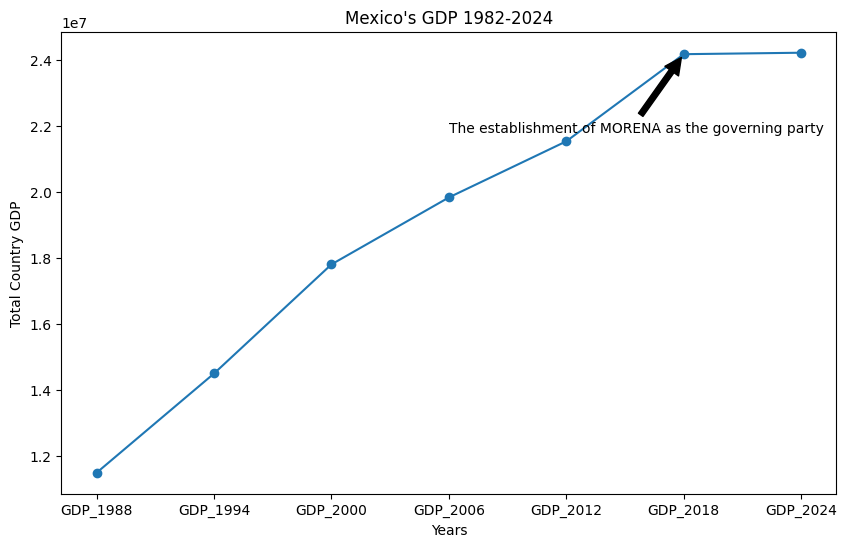

In [9]:
# First I create a filter of the columns I want to graph
GDP = ["GDP_1988", "GDP_1994", "GDP_2000", "GDP_2006", "GDP_2012", 'GDP_2018', 'GDP_2024']

# Then I add all the rows of df dataframe that meet the GDP filter, to get a line plot of "Total Country GDP 1982-2024"
GDP_df = df[GDP]
GDP_df = GDP_df.T
GDP_df.columns = df['ENTIDAD']  # Rename columns for clarity
GDP_df['Total Country GDP 1982-2024'] = GDP_df.sum(axis=1)

# Generate a line plot of "Total Country GDP 1982-2024"
plt.figure(figsize=(10, 6))
plt.plot(GDP_df.index, GDP_df['Total Country GDP 1982-2024'], marker='o', linestyle='-')

# Add title and labels
plt.title("Mexico's GDP 1982-2024")
plt.xlabel('Years')
plt.ylabel('Total Country GDP')

# Add annotation with an arrow
plt.annotate(
    'The establishment of MORENA as the governing party', 
    xy=('GDP_2018', GDP_df.loc['GDP_2018', 'Total Country GDP 1982-2024']),
    xytext=('GDP_2006', GDP_df.loc['GDP_2006', 'Total Country GDP 1982-2024'] * 1.1),
    arrowprops=dict(facecolor='black', shrink=0.05)
)

# Show plot
plt.show()


As an oppositor, It is important to highlight this economical stagnation as an argument to gain votes!

Now lets take a look per Entity

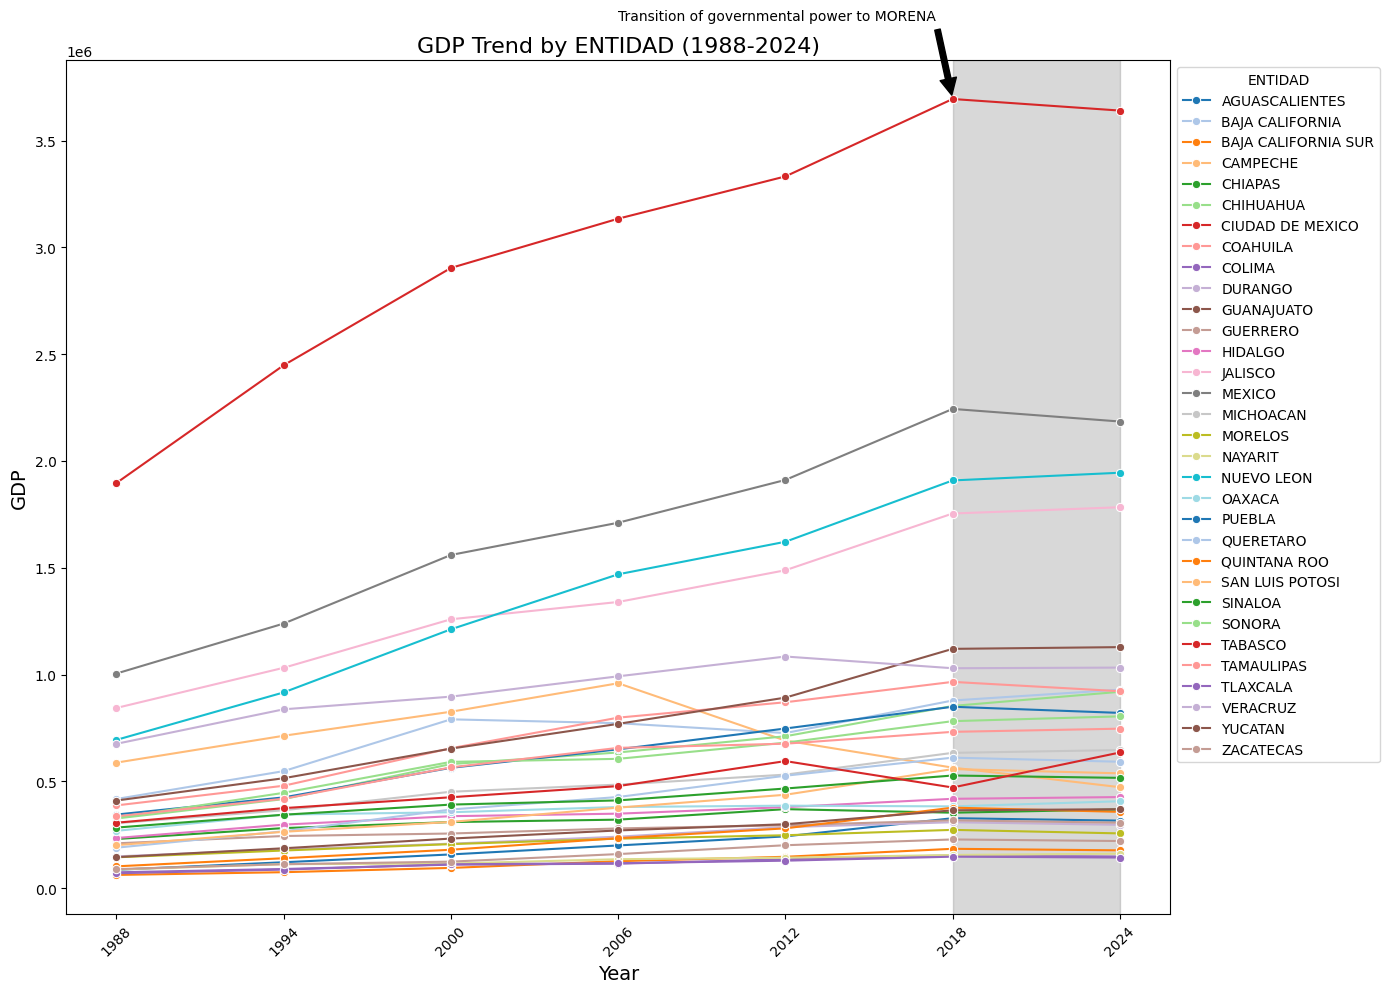

In [10]:
# Filter the columns related to GDP
GDP_columns = ["GDP_1988", "GDP_1994", "GDP_2000", "GDP_2006", "GDP_2012", 'GDP_2018', 'GDP_2024']

# Transpose the dataframe for plotting
GDP_df = df.melt(id_vars=['ENTIDAD'], value_vars=GDP_columns, 
                 var_name='Year', value_name='GDP')

# Convert 'Year' to a more readable format
GDP_df['Year'] = GDP_df['Year'].str.extract('(\d+)', expand=False)

# Plot using Seaborn
plt.figure(figsize=(14, 10))
sns.lineplot(data=GDP_df, x='Year', y='GDP', hue='ENTIDAD', palette='tab20', marker='o')

# Add title and labels
plt.title('GDP Trend by ENTIDAD (1988-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP', fontsize=14)

# Highlight the period of significant event
plt.axvspan('2018', '2024', color='gray', alpha=0.3)

# Add annotation for the significant event
plt.annotate(
    'Transition of governmental power to MORENA',
    xy=('2018', GDP_df.loc[GDP_df['Year'] == '2018', 'GDP'].max()),
    xytext=('2006', GDP_df['GDP'].max() * 1.1),
    arrowprops=dict(facecolor='black', shrink=0.05)
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='ENTIDAD')
plt.tight_layout()
plt.show()

# Too much data in only one Graph!
Lets try to put this in sub plots to increase readability

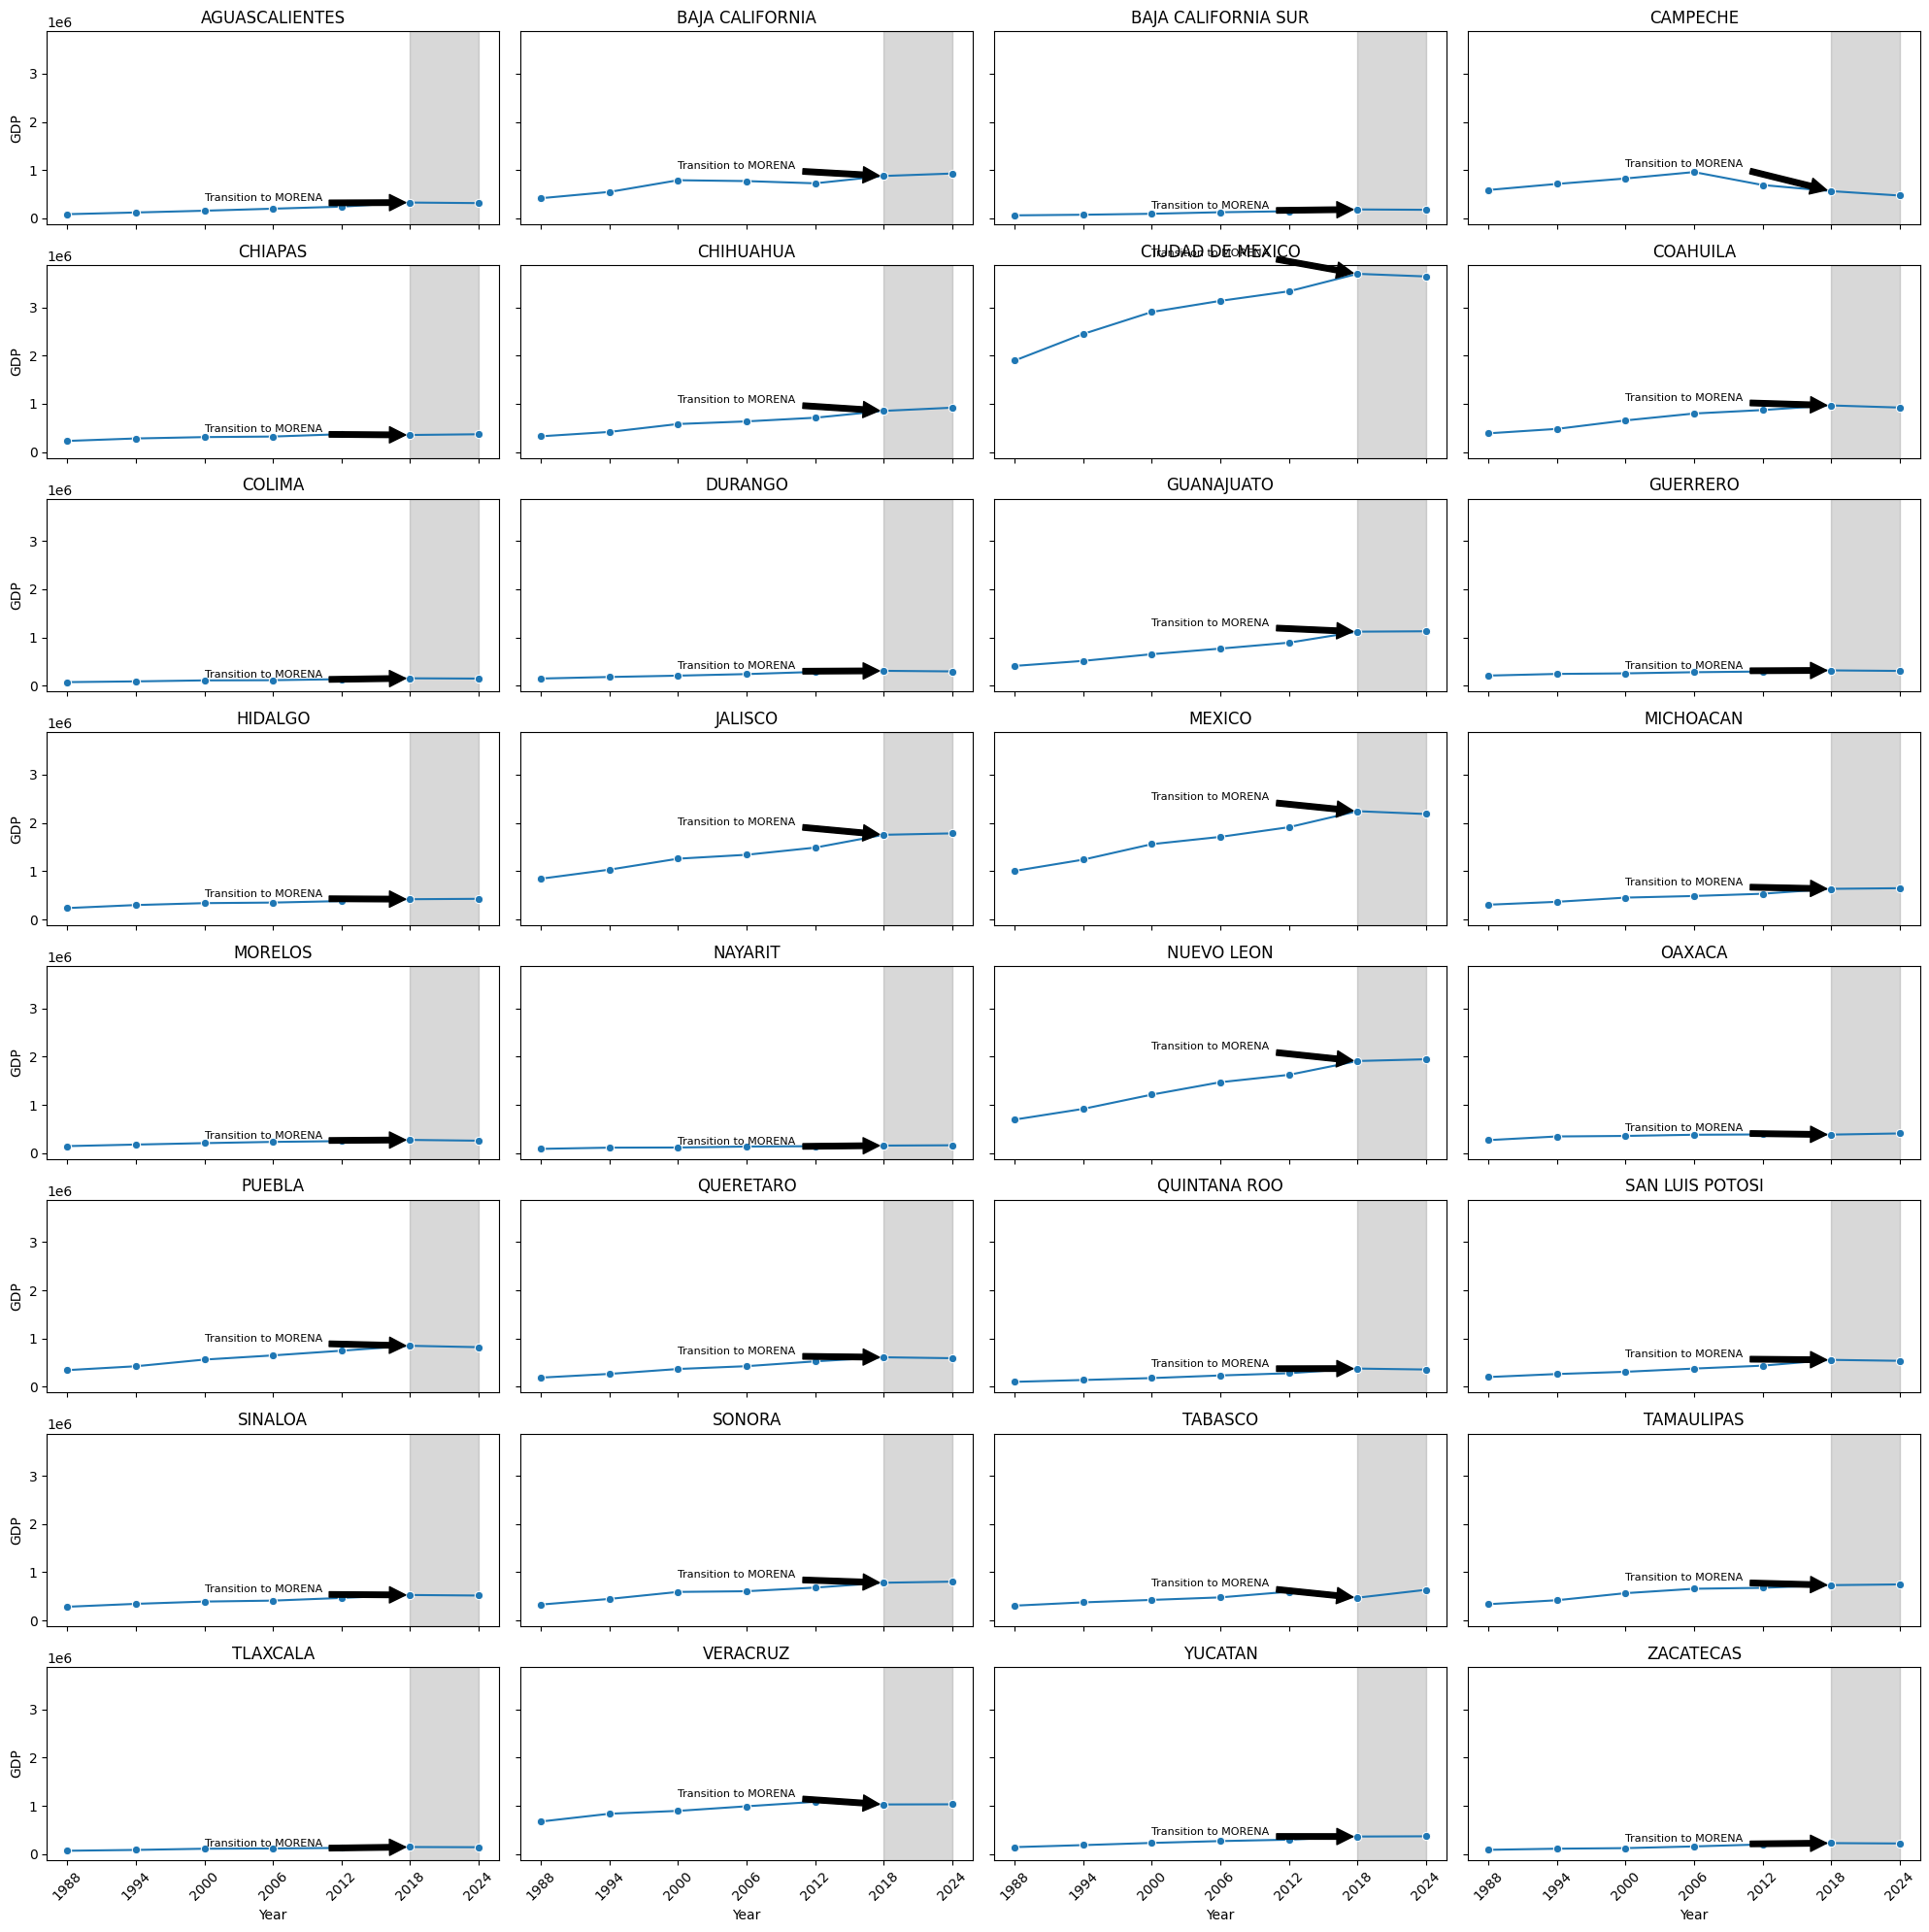

In [11]:
# Filter the columns related to GDP
GDP_columns = ["GDP_1988", "GDP_1994", "GDP_2000", "GDP_2006", "GDP_2012", 'GDP_2018', 'GDP_2024']

# Transpose the dataframe for plotting
GDP_df = df.melt(id_vars=['ENTIDAD'], value_vars=GDP_columns, 
                 var_name='Year', value_name='GDP')

# Convert 'Year' to a more readable format
GDP_df['Year'] = GDP_df['Year'].str.extract('(\d+)', expand=False)

# Create subplots
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(20, 20), sharex=True, sharey=True)
axes = axes.flatten()

# Plot each ENTIDAD in a separate subplot
for i, entidad in enumerate(df['ENTIDAD'].unique()):
    ax = axes[i]
    subset = GDP_df[GDP_df['ENTIDAD'] == entidad]
    sns.lineplot(data=subset, x='Year', y='GDP', ax=ax, marker='o')
    ax.set_title(entidad)
    ax.axvspan('2018', '2024', color='gray', alpha=0.3)
    ax.annotate(
        'Transition to MORENA',
        xy=('2018', subset.loc[subset['Year'] == '2018', 'GDP'].values[0]),
        xytext=('2000', subset['GDP'].max() * 1.1),
        arrowprops=dict(facecolor='black', shrink=0.05),
        fontsize=8
    )
    ax.tick_params(axis='x', rotation=45)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


### It improved.. however it is still hard to read!
Lets now try to put all the data in one graph but with colored stacked bars

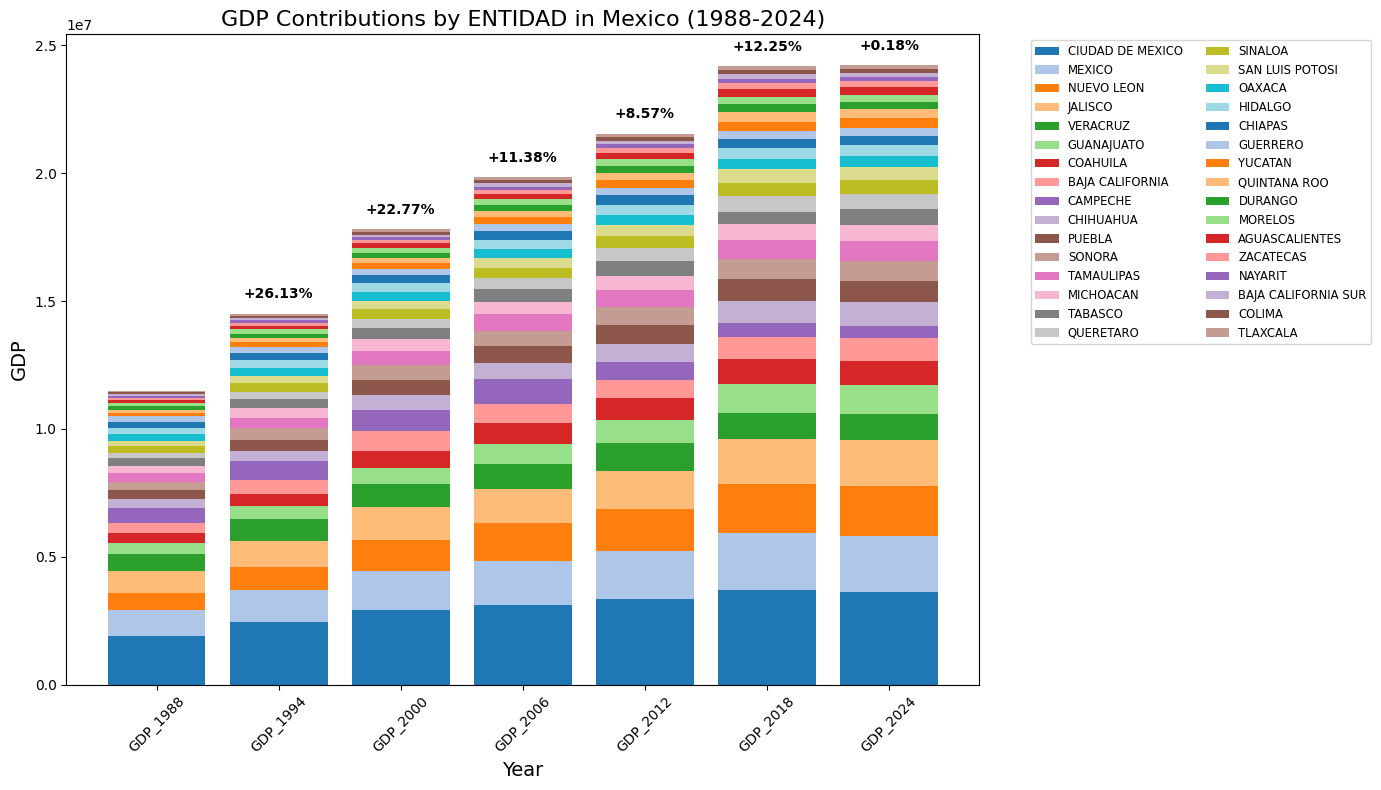

In [12]:
# Sum the GDP data for each ENTIDAD
df['Total_GDP'] = df[GDP_columns].sum(axis=1)

# Sort ENTIDADES based on Total GDP
df_sorted = df.sort_values(by='Total_GDP', ascending=False)

# Calculate total GDP for each year
total_gdp_per_year = df[GDP_columns].sum(axis=0)

# Calculate percentage change for each year compared to the previous year
percentage_changes = [0] * len(GDP_columns)
for i in range(1, len(GDP_columns)):
    percentage_changes[i] = ((total_gdp_per_year[GDP_columns[i]] - total_gdp_per_year[GDP_columns[i - 1]]) /
                             total_gdp_per_year[GDP_columns[i - 1]]) * 100

# Plotting the stacked bar graph
plt.figure(figsize=(14, 8))
bottom = [0] * len(GDP_columns)
colors = plt.cm.tab20.colors

for i, entidad in enumerate(df_sorted['ENTIDAD']):
    gdp_values = df_sorted[df_sorted['ENTIDAD'] == entidad][GDP_columns].values[0]
    plt.bar(GDP_columns, gdp_values, bottom=bottom, label=entidad, color=colors[i % len(colors)])
    bottom = [x + y for x, y in zip(bottom, gdp_values)]

# Add percentage change labels for each year compared to the previous year
for i in range(1, len(GDP_columns)):
    plt.text(i, total_gdp_per_year[GDP_columns[i]] + max(total_gdp_per_year) * 0.02,
             f'+{percentage_changes[i]:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')


# Add title and labels
plt.title('GDP Contributions by ENTIDAD in Mexico (1988-2024)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(range(len(GDP_columns)), GDP_columns, rotation=45)

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small', ncol=2)

# Show plot
plt.tight_layout()
plt.show()


Perfect, enough good GDP visualization! This will be a good insight for Oposition party that can be useful to demonstrate good results in their periods...
Now lets focus on Votes again.

### Votes DF features selection (model simplification)

Our Prediction Variable is "Competitor Votes" which represents Claudia Sheinbaum, so i will get read of Xochitl and Maynez votes to focus only in 1 dependant variable.

I will also eliminate the GDP from 1982 to 2012, so that I can focus only in the years 2018, 2024 where MORENA Competitor parti started operations.


In [13]:
eliminate= ["GDP_1988", "GDP_1994", "GDP_2000", "GDP_2006", "GDP_2012",'GDP_2018', 'Xochitl_Opposition_Votes', 'Maynez_Independant_Votes']
simplified_df= df.drop(columns= eliminate)

Now with less columns...
Lets recap about the correlation matrix to try to identify the most relevants variables that show some sort of correlation to the independant variable.
In the other hand, lets look at the dependant variables to try to find some correlations between them in order to pick only on of them (to avoid multicolinearity)

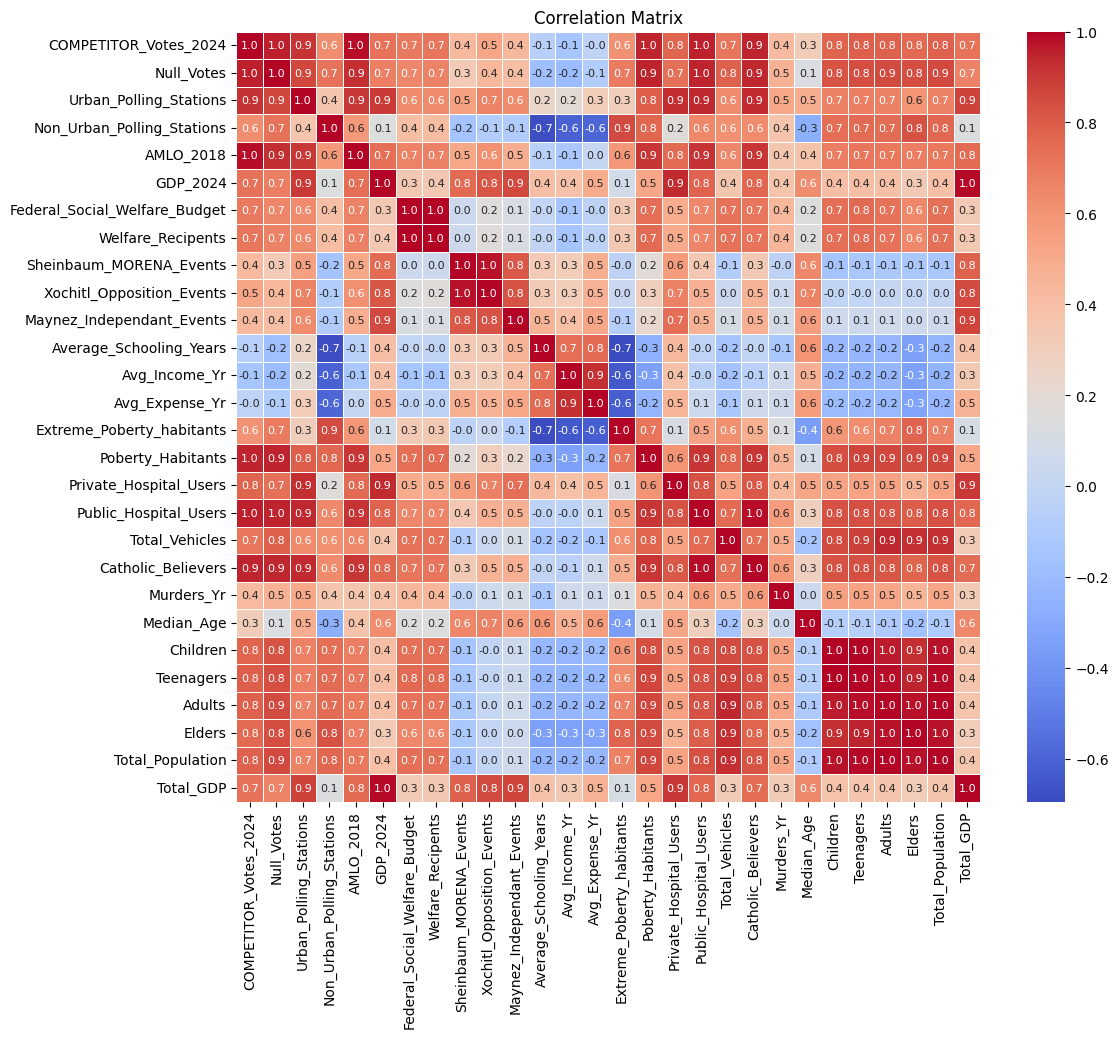

In [14]:
# Exclude the 'ENTIDAD' column for the correlation matrix
numeric_df = simplified_df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap with smaller text and fewer decimal places
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".1f", annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

### Pair Plots 
When I was plotting the pair plots of my previous Numeric Matrix I realized that I have TOO Much variables in my model. So in this section I will eliminate those X variables that are correlated between them in order to avoid multicolinearity. In the other hand I might also eliminate those variables that doesn't have any relationship at all to my Y Output (Independant variable: "Competitor Votes")

Pair Plot took me 1.41minutes!! and it is almost imposible to read!

NOTE: THis section is commented during debugging because it causes a lot of trouble to compute (3.14 minutes)

In [15]:
# Pairplot of the dataframe
#print("\nPairplot of the dataframe:")
#sns.pairplot(numeric_df)
#plt.show()

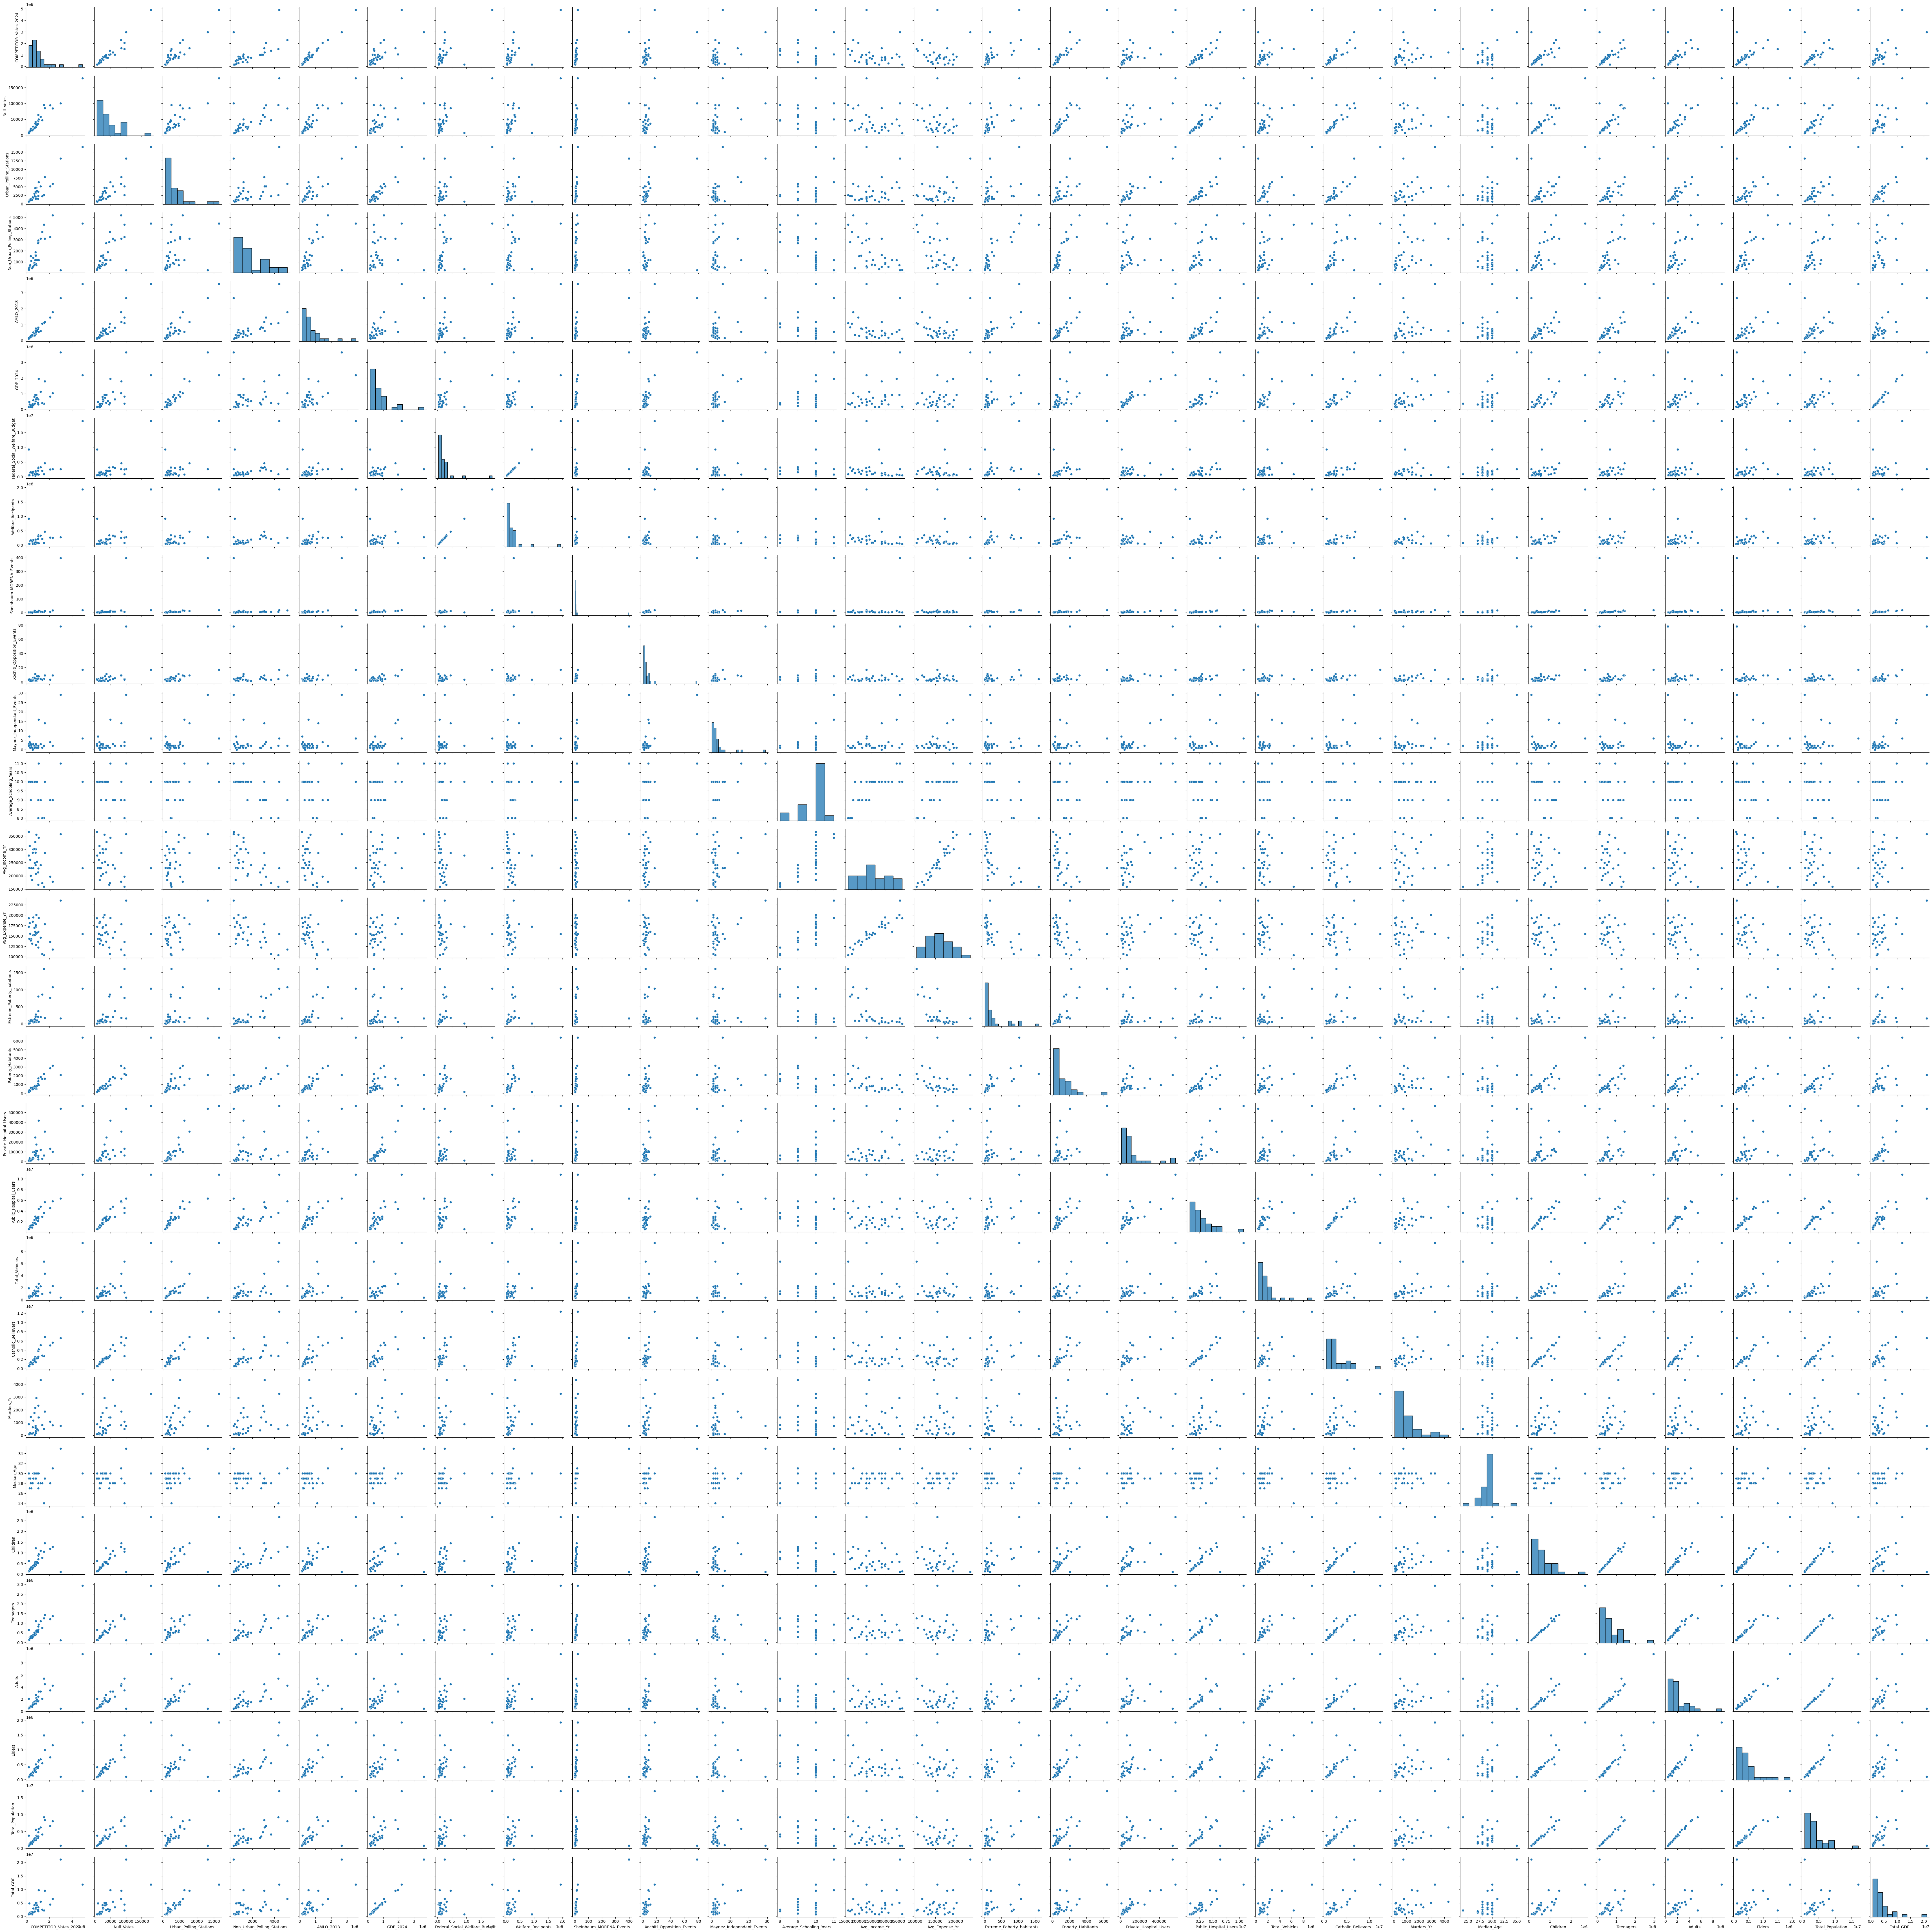

I can clearly see that Welfare Recipents seems to be directly related to Federal Welfare Budget... But lets plot

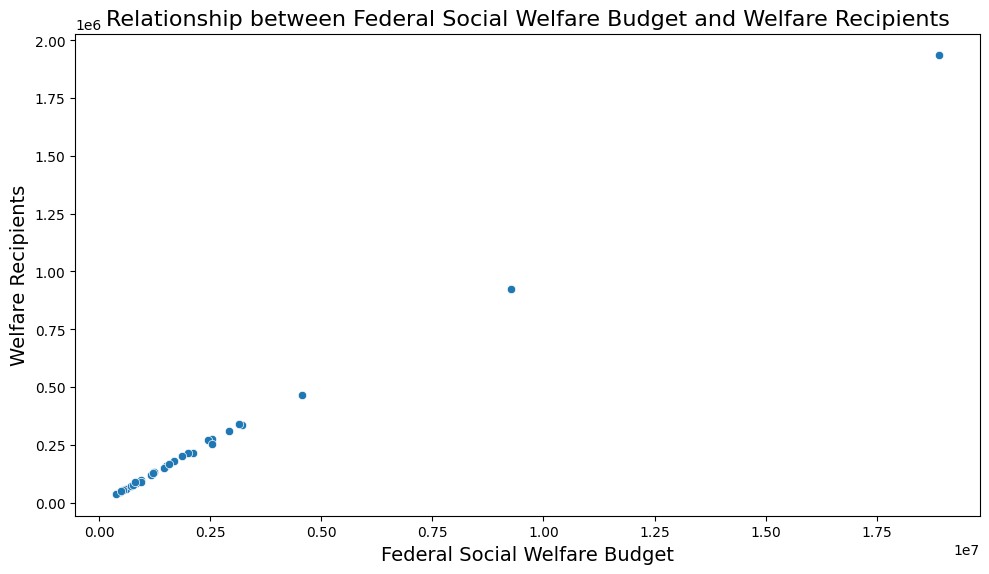

In [16]:
# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=numeric_df, x='Federal_Social_Welfare_Budget', y='Welfare_Recipents')

# Add title and labels
plt.title('Relationship between Federal Social Welfare Budget and Welfare Recipients', fontsize=16)
plt.xlabel('Federal Social Welfare Budget', fontsize=14)
plt.ylabel('Welfare Recipients', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

As expected highly correlated, so I will drop it

### Drop very correlated X Variables:

In [17]:
#Lets drop then one of those 2 variables (In this case I will drop the recipents and keep only budget)
numeric_df.drop(columns=['Welfare_Recipents'], inplace=True)


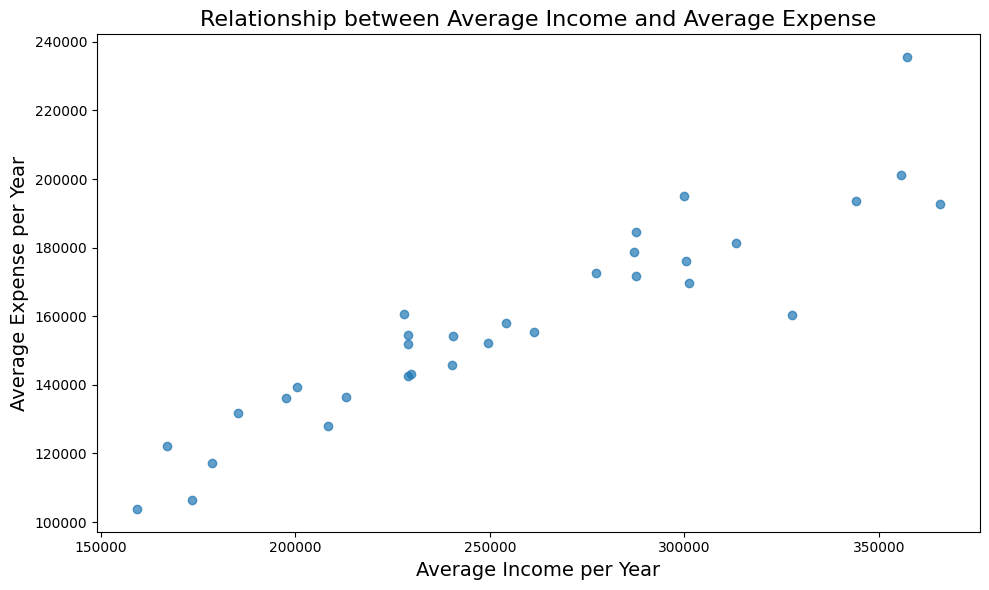

In [18]:
# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(numeric_df['Avg_Income_Yr'], numeric_df['Avg_Expense_Yr'], alpha=0.7)

# Add title and labels
plt.title('Relationship between Average Income and Average Expense', fontsize=16)
plt.xlabel('Average Income per Year', fontsize=14)
plt.ylabel('Average Expense per Year', fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

In this case there is also a strong correlation of 0.9, so I will drop expense and keep income only

In [19]:
numeric_df.drop(columns=['Avg_Expense_Yr'], inplace=True)


Children, Teenagers, Elders and Adults are all strongly correlated (0.9 and 1.0 Corr Value)!

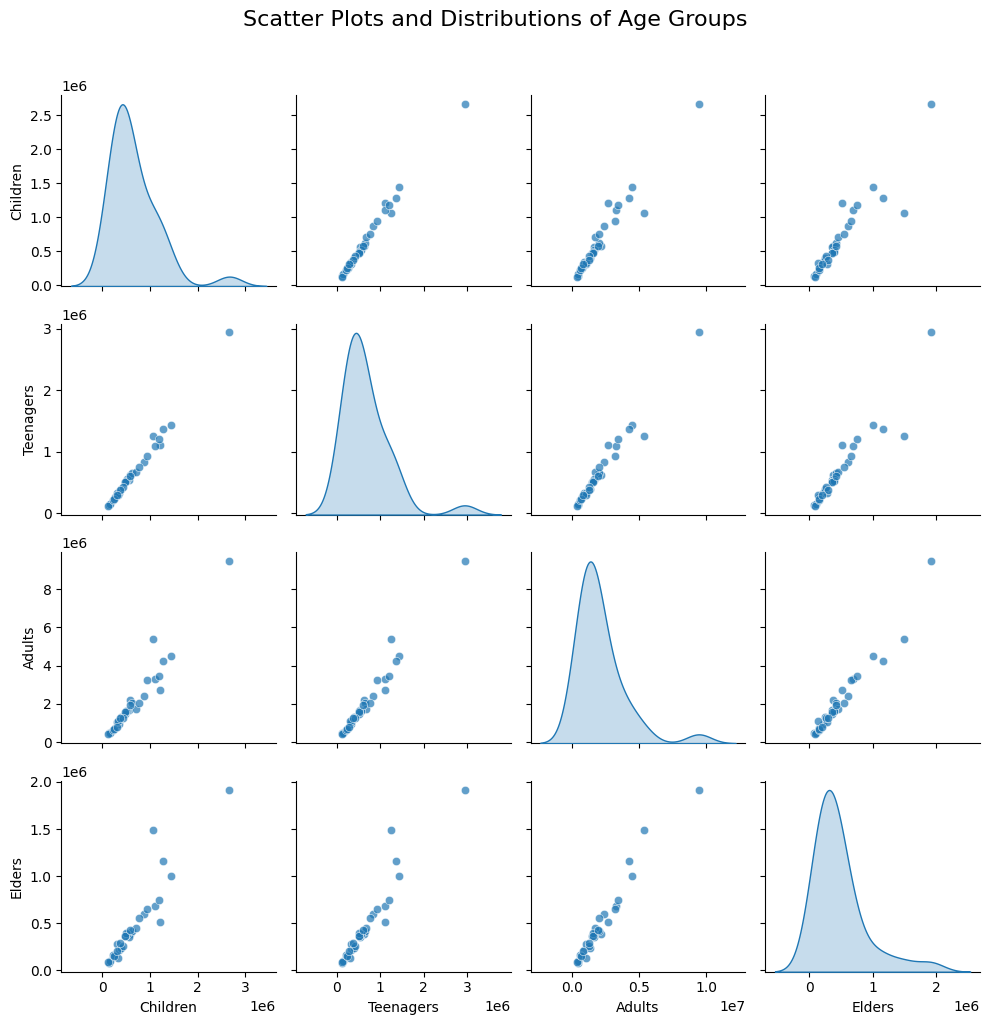

In [20]:
# Create a pairplot to visualize the correlations
age_groups = ['Children', 'Teenagers', 'Adults', 'Elders']
sns.pairplot(numeric_df[age_groups], diag_kind='kde', plot_kws={'alpha':0.7})

# Add title
plt.suptitle('Scatter Plots and Distributions of Age Groups', y=1.02, fontsize=16)

# Show plot
plt.tight_layout()
plt.show()

Before we eliminate, lets see the population votes per different segments excluding children (because they don't vote)

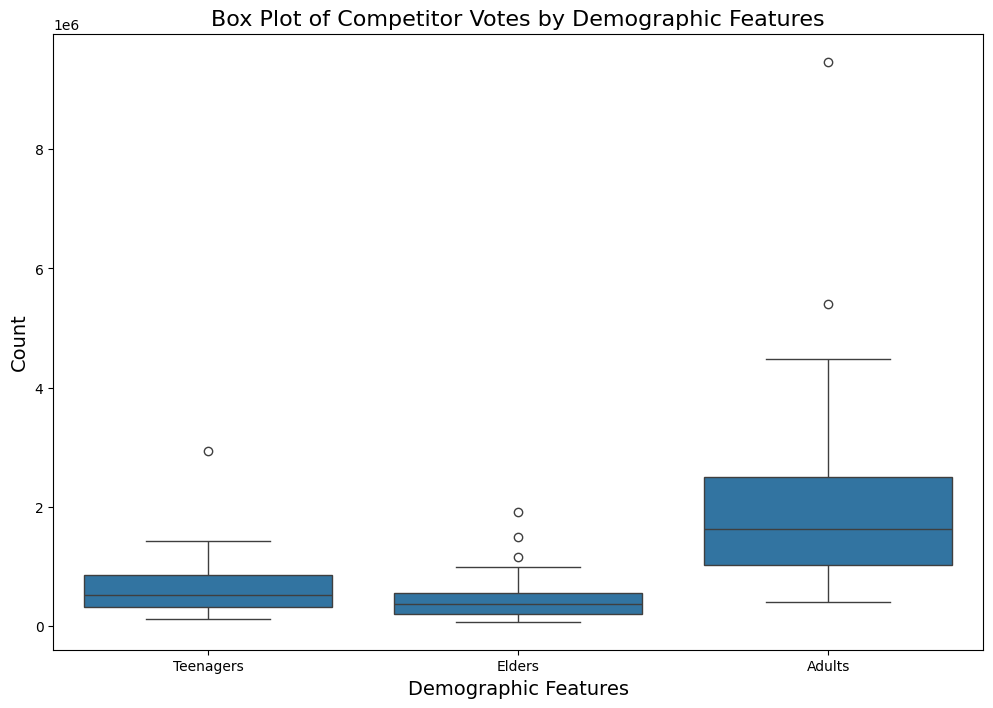

In [21]:
# Define the demographic columns
demographic_columns = ['Teenagers', 'Elders', 'Adults']

# Transform the data into a long format
df_long = pd.melt(df, id_vars=['COMPETITOR_Votes_2024'], value_vars=demographic_columns, 
                  var_name='Demographic Feature', value_name='Count')

# Create box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Demographic Feature', y='Count', data=df_long)
plt.title('Box Plot of Competitor Votes by Demographic Features', fontsize=16)
plt.xlabel('Demographic Features', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


As the 4 categories are highly correlated, but however I see a greater vote count in Adults, I will drop the remaining 3 and keep only adults

In [22]:
numeric_df.drop(columns=['Elders', 'Teenagers', 'Children'], inplace=True)


Lets see how the variables amount is improving:

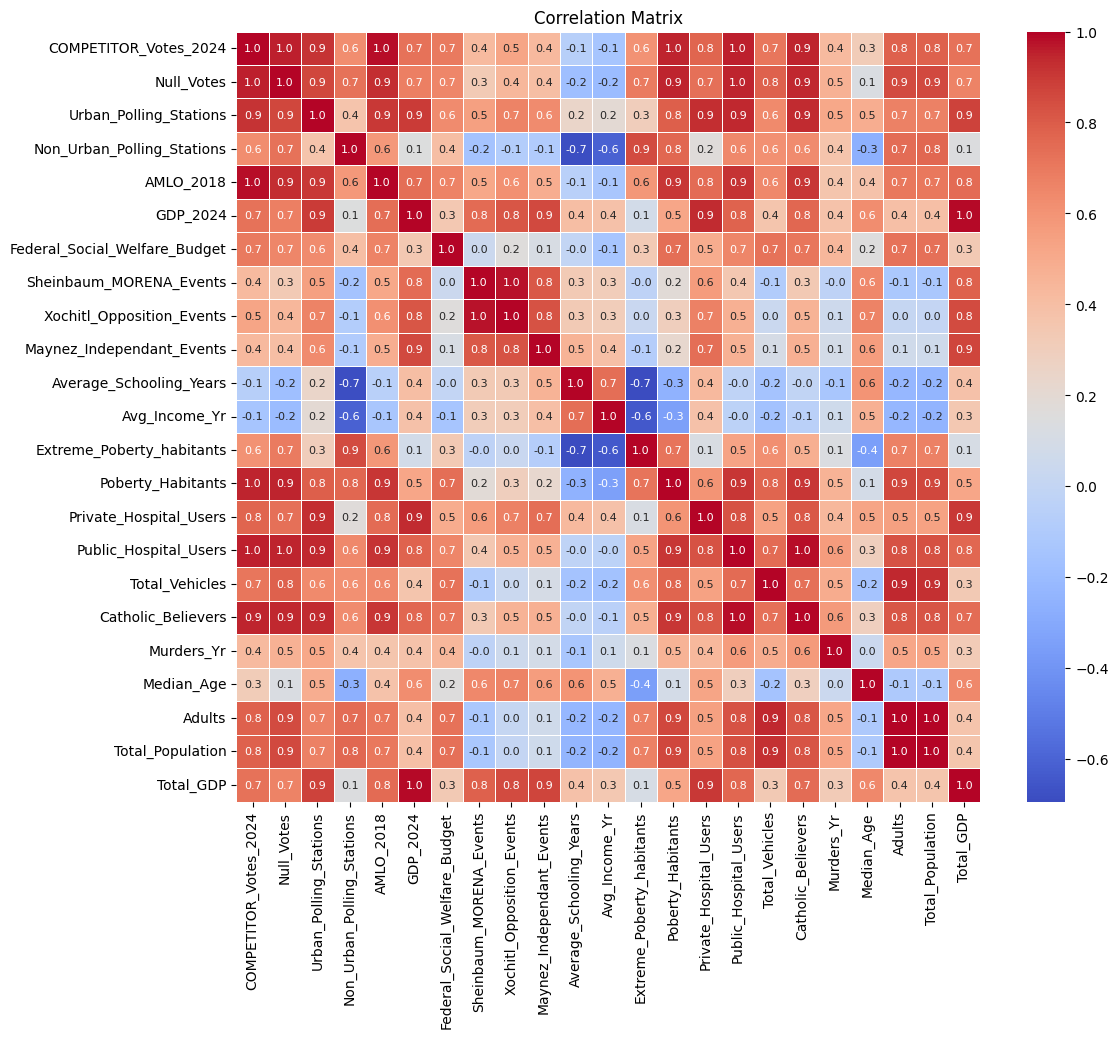

In [23]:
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap with smaller text and fewer decimal places
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".1f", annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

Now is getting better to read... and comprehend. But still I see a lot of correlated Features.

For example Null votes is highly correlated to Poberty Regions, Rural Regions, Elders... so seems to be a variable that interacts with many social factors but could add extra noice to my model. In addition. I also see that the % of Null votes is low compared to the overall valid votes (less than 2%)... so I will drop if for this time

In [24]:
numeric_df.drop(columns=['Null_Votes'], inplace=True)


Also I see that the number of events done by Competitors and oposition are highly related within them.  But also very related to the entities GDP . So I have an intuition that the 3 polititians prioritized the ENTIDADES with more Economic Size. Lets Drop all the polititians and focus only on the Competitor.


In [25]:
# Drop columns related to opposition and independent candidates' events
numeric_df.drop(columns=['Xochitl_Opposition_Events', 'Maynez_Independant_Events'], inplace=True)


In [26]:
# As Total GDP will not be used anymore I will drop it as well
numeric_df.drop(columns=['Total_GDP'], inplace=True)


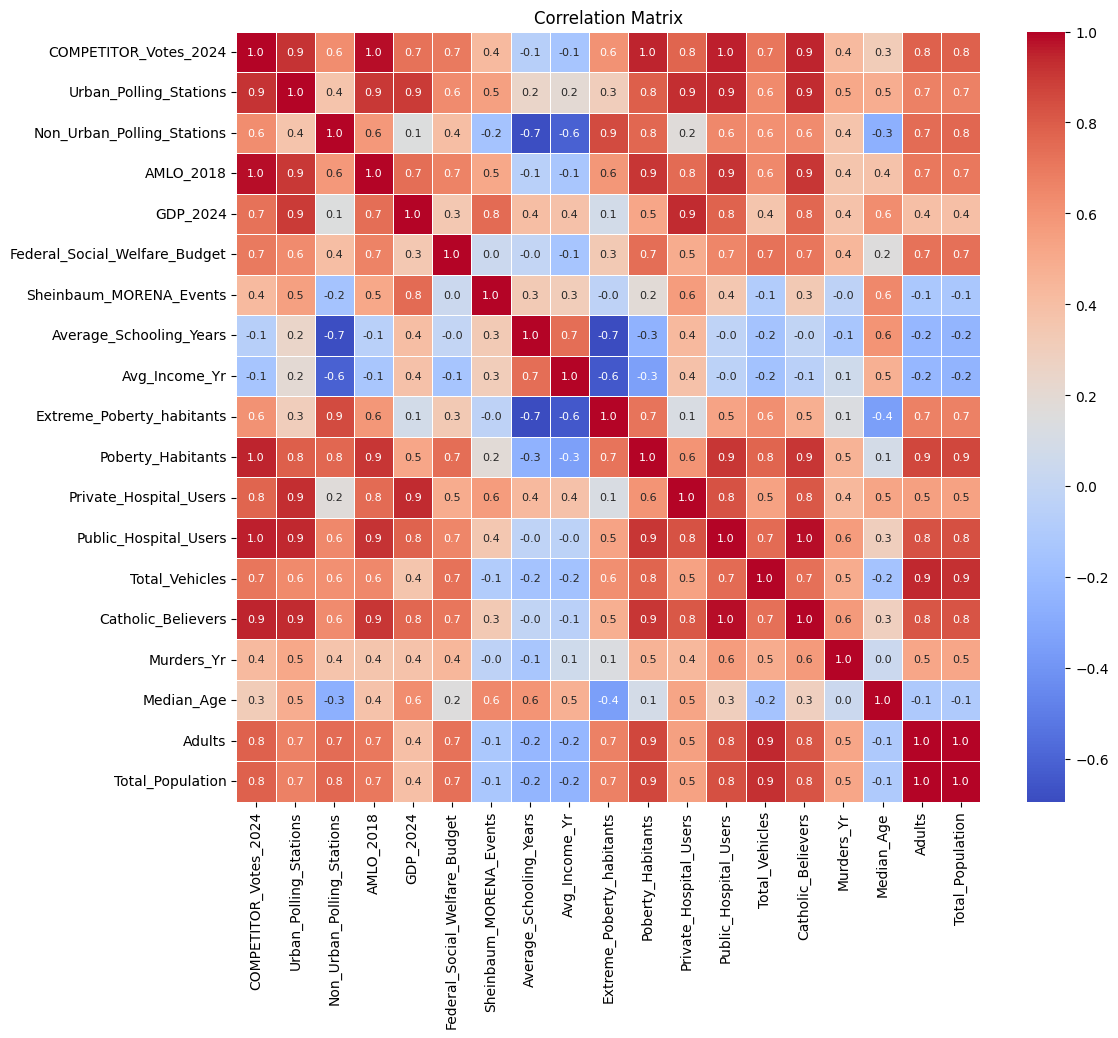

In [27]:
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap with smaller text and fewer decimal places
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".1f", annot_kws={"size": 8})
plt.title('Correlation Matrix')
plt.show()

In [28]:
#Private and Public Hospitals are highly correlated within them. WHile Public seems to be more correlated to the Independant Variable COMPETITOR_Votes_2024
#I will drop the Private Hospitals
numeric_df.drop(columns=['Private_Hospital_Users'], inplace=True)

In [29]:
#Total Population worked during Data Wrangling as a % Estimator of votes, but I will not need it in this EDA, so I will drop it as well
numeric_df.drop(columns=['Total_Population'], inplace=True)

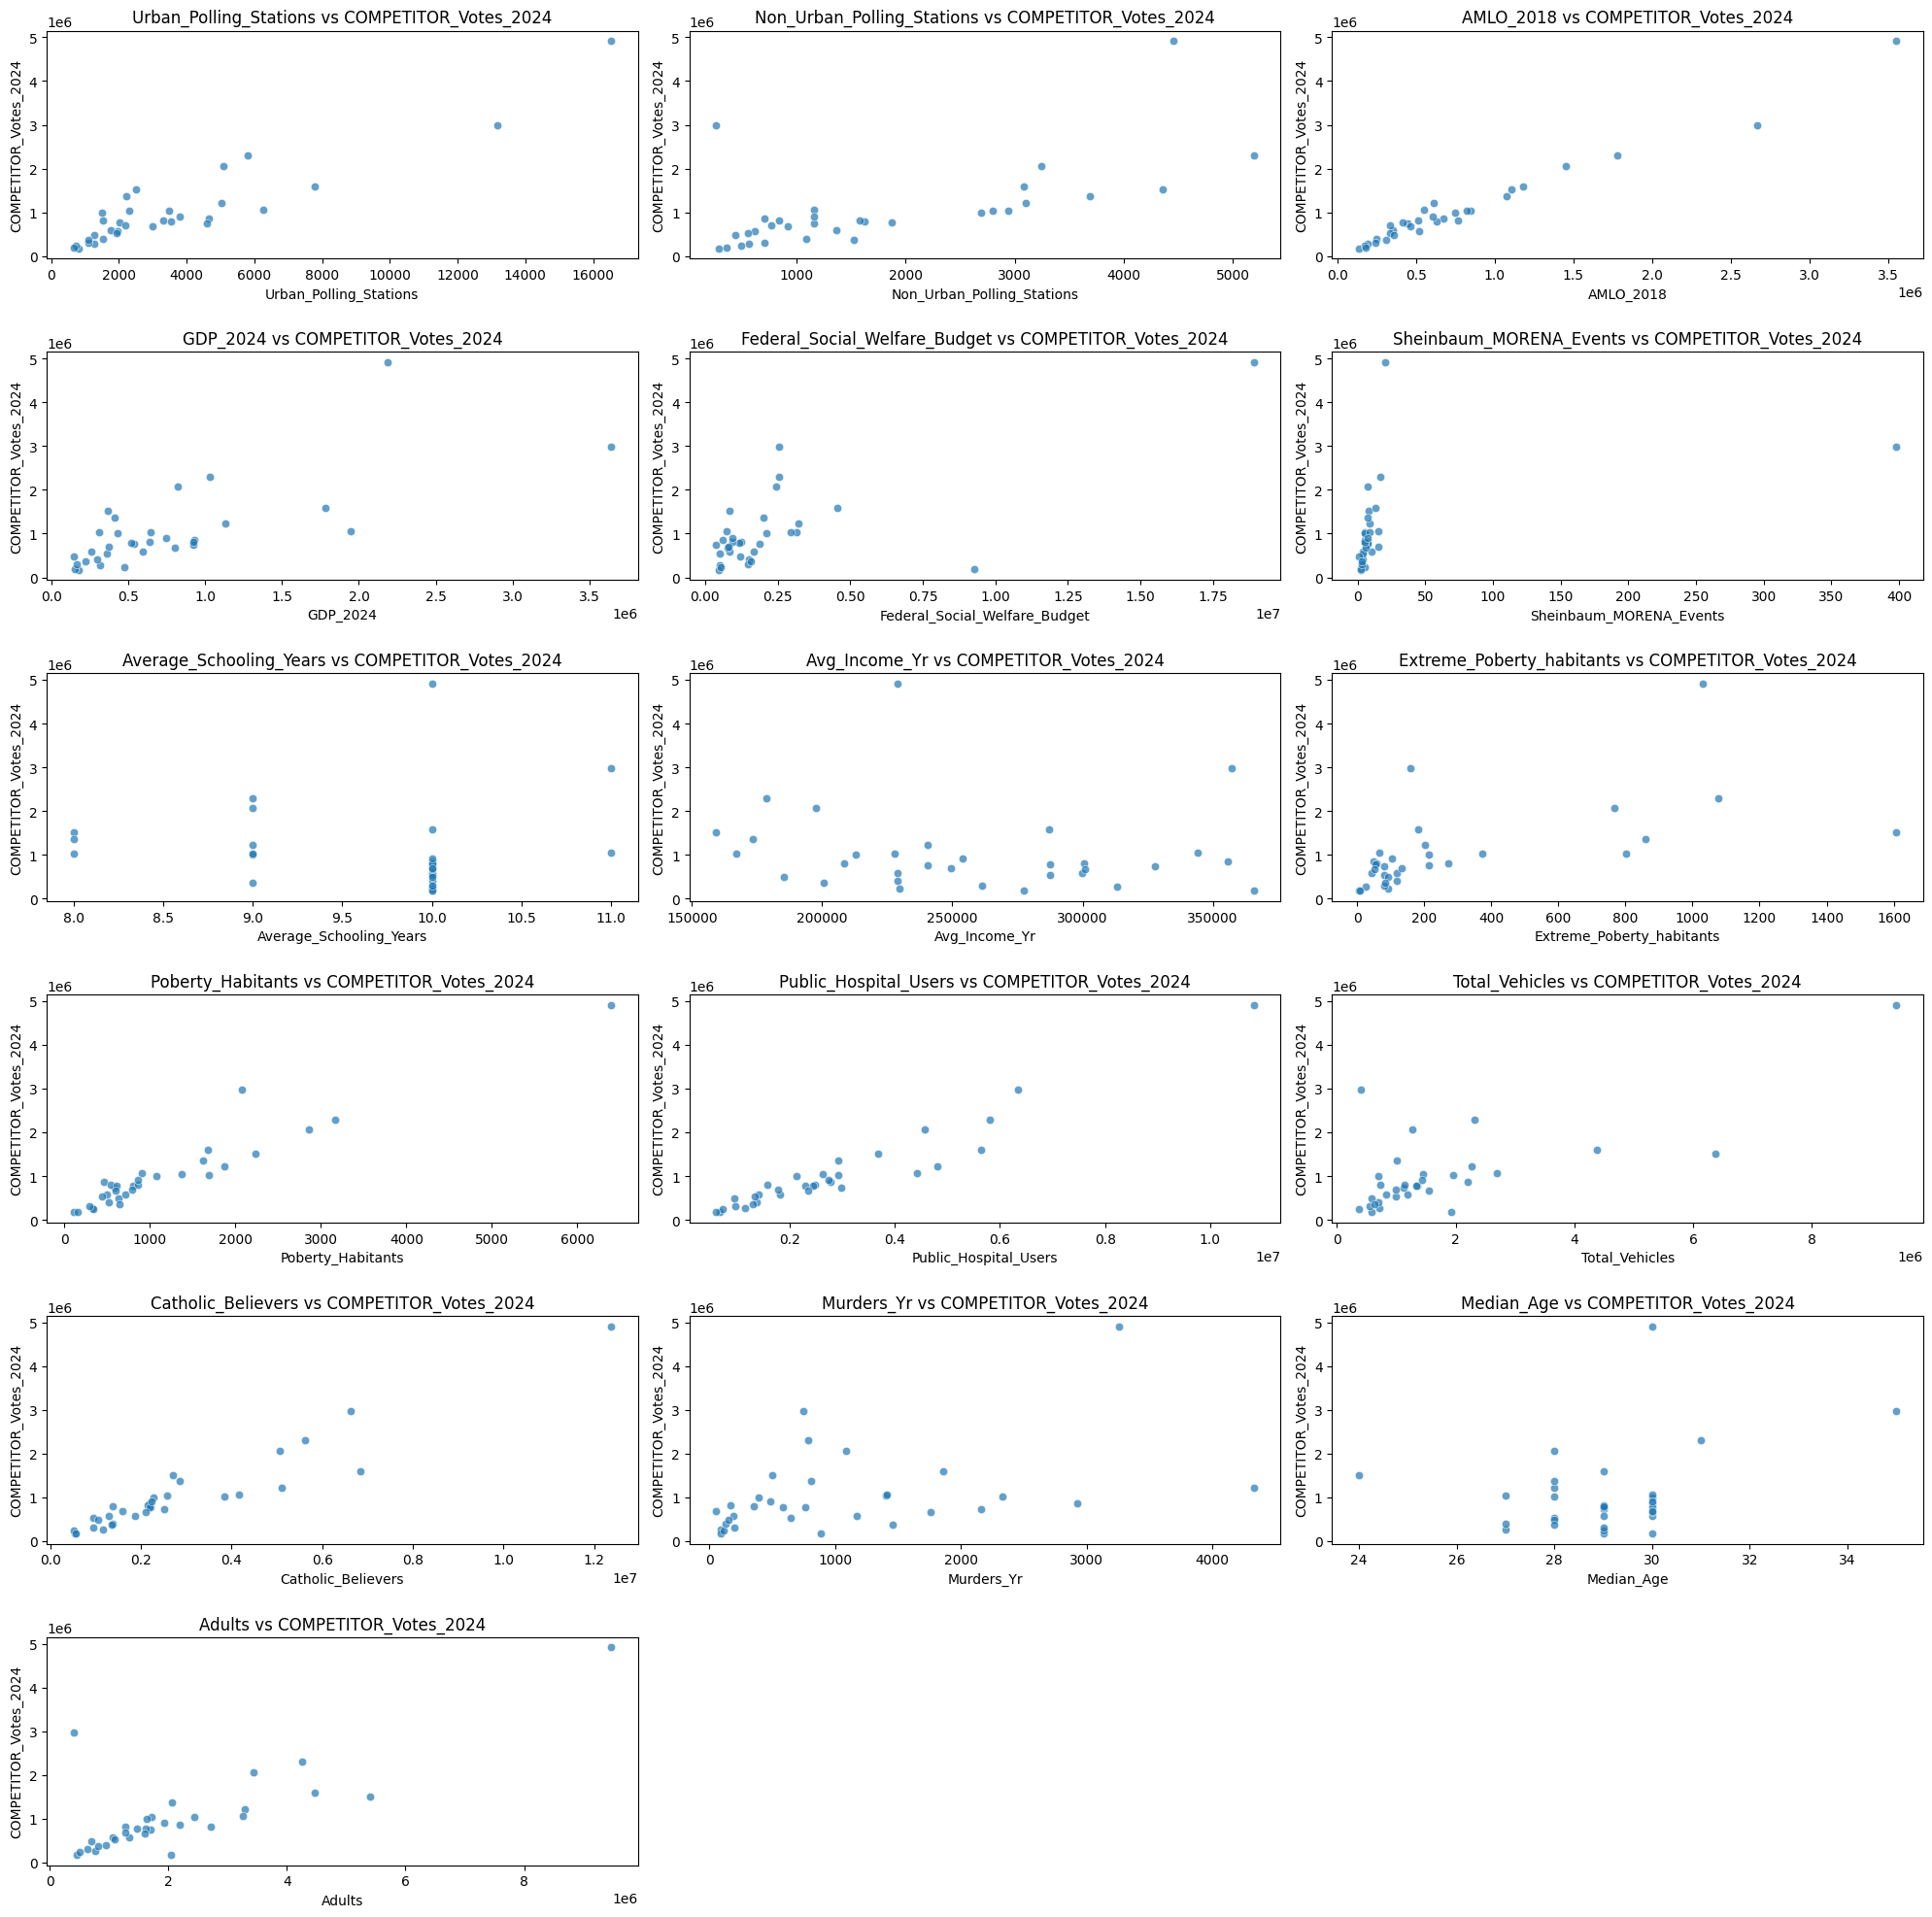

In [30]:
# Define the target variable
target_variable = 'COMPETITOR_Votes_2024'

# Define the feature columns
feature_columns = [
    'Urban_Polling_Stations', 'Non_Urban_Polling_Stations', 'AMLO_2018', 'GDP_2024',
    'Federal_Social_Welfare_Budget', 'Sheinbaum_MORENA_Events', 'Average_Schooling_Years',
    'Avg_Income_Yr', 'Extreme_Poberty_habitants', 'Poberty_Habitants',
    'Public_Hospital_Users', 'Total_Vehicles', 'Catholic_Believers', 'Murders_Yr',
    'Median_Age', 'Adults'
]

# Calculate the number of rows and columns for the subplots grid
num_features = len(feature_columns)
num_cols = 3
num_rows = (num_features + num_cols - 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
axes = axes.flatten()

# Plot each feature against the target variable
for i, feature in enumerate(feature_columns):
    sns.scatterplot(data=numeric_df, x=feature, y=target_variable, ax=axes[i], alpha=0.7)
    axes[i].set_title(f'{feature} vs {target_variable}', fontsize=12)
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel(target_variable, fontsize=10)

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show plot
plt.tight_layout()
plt.show()



From These Graphs I see that Median Age and Average Schooling Years look more like a Categorical Variable rather than Numerical... 
The reason why I say that is because I see a very marked vertical lines in different ranges. So I will try to prove this idea with these steps:

1) I will count unique X Values in Median Age feature
2) I will count unique X Values in Average Schooling Years feature 
3) I will plot them in a box plot 
4) I will perform some Hypothesis testing to test if it is relevant to keep those numerical Variables (If they are influencing in something to my Y Independant Variable)

In [31]:
# I will count unique X Values in Median Age feature of my numeric_df dataframe
MedianAge_ranges= numeric_df['Median_Age'].value_counts()
print(numeric_df['Median_Age'].value_counts())

Median_Age
30    10
29     9
28     7
27     3
24     1
35     1
31     1
Name: count, dtype: int64


In [32]:
# I will count unique X Values in Average Schooling Years feature 
print(numeric_df['Average_Schooling_Years'].value_counts())

Average_Schooling_Years
10    21
9      6
8      3
11     2
Name: count, dtype: int64


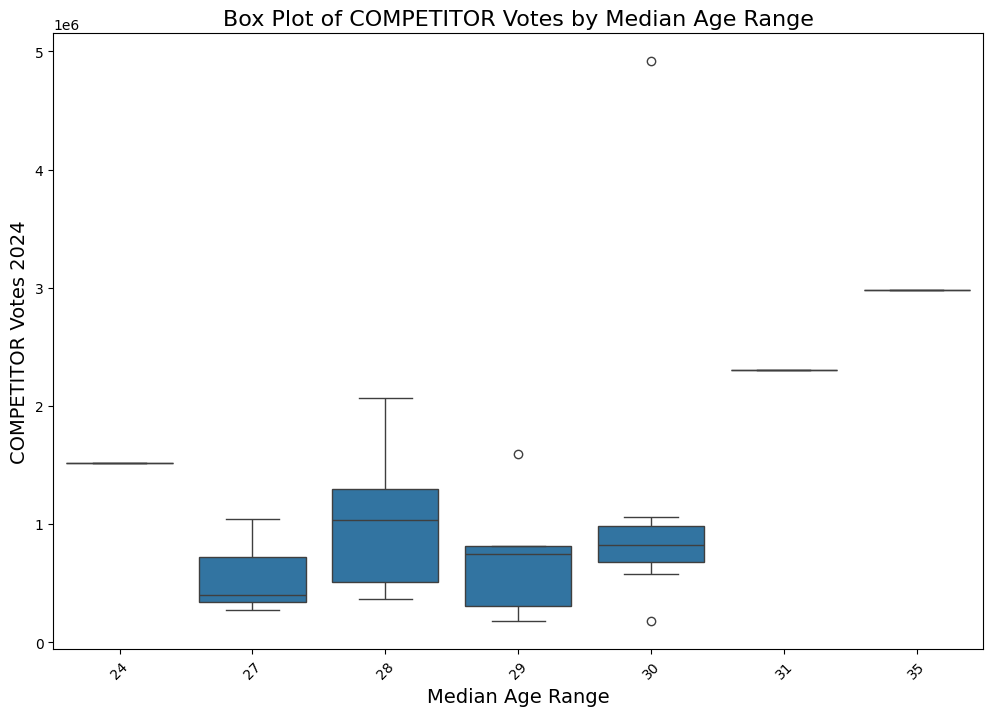

In [33]:
# I will box plot the sum votes by Median Age Range to see if there is any pattern
plt.figure(figsize=(12, 8))
sns.boxplot(x='Median_Age', y='COMPETITOR_Votes_2024', data=numeric_df)
plt.title('Box Plot of COMPETITOR Votes by Median Age Range', fontsize=16)
plt.xlabel('Median Age Range', fontsize=14)
plt.ylabel('COMPETITOR Votes 2024', fontsize=14)
plt.xticks(rotation=45)
plt.show()


In [34]:
# As I only have 1 count in 24, 31 and 35 Median Ranges ENTIDADES, I will drop them from the box plot and review the distribution of the Ranges in 27, 28, 29,30
# I will store the distributions of votes in a new dataframe called Median_Age_df_27_30
Median_Age_df_27_30= numeric_df[(numeric_df['Median_Age'] == 27) | (numeric_df['Median_Age'] == 28) | (numeric_df['Median_Age'] == 29) | (numeric_df['Median_Age'] == 30)]
Median_Age_df_27_30.head()

COMPETITOR_Votes_2024  Urban_Polling_Stations  Non_Urban_Polling_Stations  \
0                 270389                    1279                         563   
1                 862661                    4671                         703   
2                 175755                     827                         287   
3                 240693                     734                         496   
5                 744823                    4601                        1160   

   AMLO_2018  GDP_2024  Federal_Social_Welfare_Budget  \
0     190820    316500                         495079   
1     675810    929459                         604660   
2     136806    177421                         472056   
3     171328    473101                         536081   
5     441965    919617                         386882   

   Sheinbaum_MORENA_Events  Average_Schooling_Years  Avg_Income_Yr  \
0                        3                       10         313152   
1                        5                       10         355648   
2                        2                       10         365668   
3                        5                       10         229832   
5                        6                       10         327716   

   Extreme_Poberty_habitants  Poberty_Habitants  Public_Hospital_Users  \
0                         26                326                1153954   
1                         50                461                2783913   
2                          6                106                 666840   
3                         92                337                 721266   
5                         80                589                2975346   

   Total_Vehicles  Catholic_Believers  Murders_Yr  Median_Age   Adults  
0          721372             1159832          88          27   761561  
1         2208801             2187369        2925          30  2187557  
2          587090              544008          90          29   456475  
3          372668              515526         110          29   504195  
5         1127781             2514110        2157          29  1698511

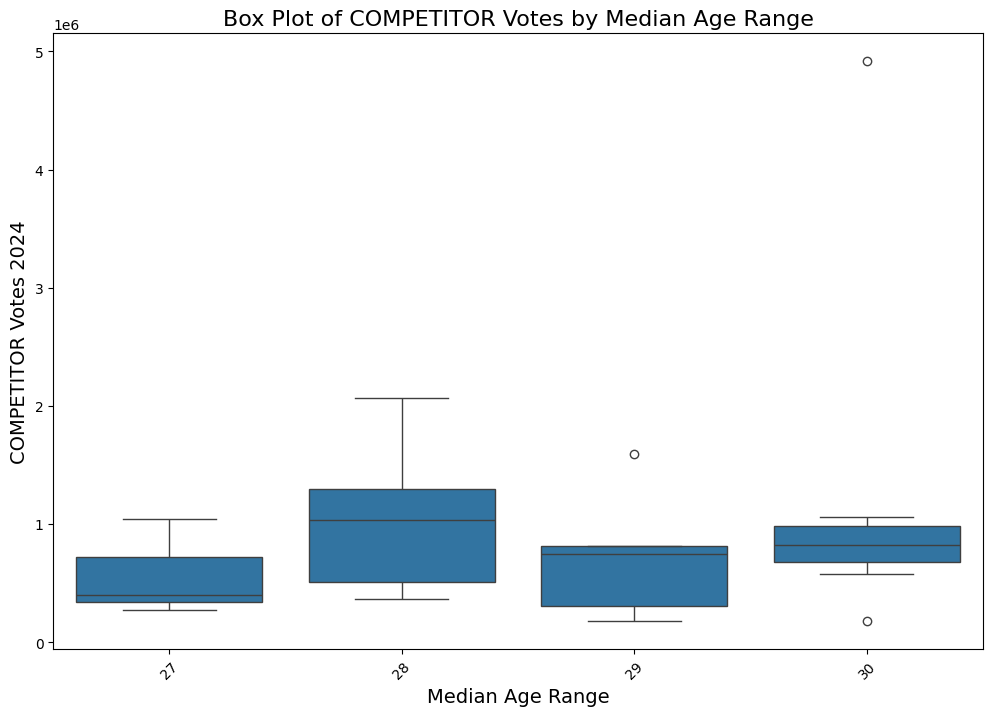

In [35]:
# I will box plot the sum votes by Median Age Range to see if there is any pattern
plt.figure(figsize=(12, 8))
sns.boxplot(x='Median_Age', y='COMPETITOR_Votes_2024', data=Median_Age_df_27_30)
plt.title('Box Plot of COMPETITOR Votes by Median Age Range', fontsize=16)
plt.xlabel('Median Age Range', fontsize=14)
plt.ylabel('COMPETITOR Votes 2024', fontsize=14)
plt.xticks(rotation=45)
plt.show()


Lets now check Average Schooling Years Variable


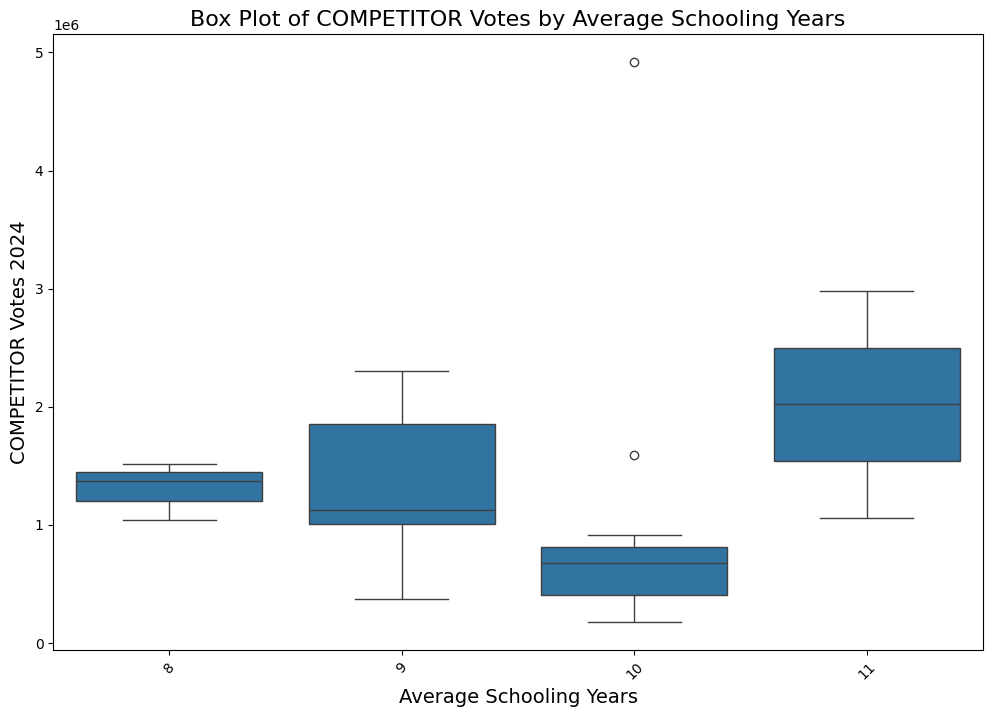

In [36]:
# I will box plot the sum votes by Average_Schooling_Years to see if there is any pattern
plt.figure(figsize=(12, 8))
sns.boxplot(x='Average_Schooling_Years', y='COMPETITOR_Votes_2024', data=numeric_df)
plt.title('Box Plot of COMPETITOR Votes by Average Schooling Years', fontsize=16)
plt.xlabel('Average Schooling Years', fontsize=14)
plt.ylabel('COMPETITOR Votes 2024', fontsize=14)
plt.xticks(rotation=45)
plt.show()


### Hypothesis testing 1: Average Schooling Years

In [37]:
# OK Now lets do a Hypothesis Testing of Average Schooling Years Features with relation to Competitor Votes 2024
# As I am comparing 4 different Categories I will use ANOVA for This.
#but first I will store my boxplot in a more simple dataframe called Avg_schooling_df
Avg_schooling_df= numeric_df[['Average_Schooling_Years', 'COMPETITOR_Votes_2024']]
Avg_schooling_df.head(32)

# Now I will first check the normality of the COMPETITOR_Votes_2024 of Avg_schooling_df, starting with the category 8
from scipy.stats import shapiro
stat, p = shapiro(Avg_schooling_df[Avg_schooling_df['Average_Schooling_Years'] == 8]['COMPETITOR_Votes_2024'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Create Interpreation method:
def interpret(p):
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

#Call Interpretation method
interpret(p)


Statistics=0.957, p=0.600
Sample looks Gaussian (fail to reject H0)


In [38]:
#Now lets do the same but with Category 9, but this time using the previous intepretation method
stat, p = shapiro(Avg_schooling_df[Avg_schooling_df['Average_Schooling_Years'] == 9]['COMPETITOR_Votes_2024'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
interpret(p)


Statistics=0.928, p=0.563
Sample looks Gaussian (fail to reject H0)


In [39]:
#Now lets do the same but with Category 10, but this time using the previous intepretation method
stat, p = shapiro(Avg_schooling_df[Avg_schooling_df['Average_Schooling_Years'] == 10]['COMPETITOR_Votes_2024'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
interpret(p)


Statistics=0.510, p=0.000
Sample does not look Gaussian (reject H0)


In [40]:
# Category 11 only has 2 values, so I cannot run a normality test on it, so I will drop it from the ANOVA test
# Now I will run the ANOVA test on the 3 categories
from scipy.stats import f_oneway
stat, p = f_oneway(Avg_schooling_df[Avg_schooling_df['Average_Schooling_Years'] == 8]['COMPETITOR_Votes_2024'],
                   Avg_schooling_df[Avg_schooling_df['Average_Schooling_Years'] == 9]['COMPETITOR_Votes_2024'],
                   Avg_schooling_df[Avg_schooling_df['Average_Schooling_Years'] == 10]['COMPETITOR_Votes_2024'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret the results
alpha = 0.05
if p > alpha:
    print('The Average Schooling Years do not have a significant effect on COMPETITOR Votes 2024 (fail to reject H0)')
else:  
    print('The Average Schooling Years have a significant effect on COMPETITOR Votes 2024 (reject H0)')
    

Statistics=0.947, p=0.401
The Average Schooling Years do not have a significant effect on COMPETITOR Votes 2024 (fail to reject H0)


### Hypothesis Testing #2: Median Age Range

In [41]:
# OK Now lets do a Hypothesis Testing of Median Age Range Feature with relation to Competitor Votes 2024
#As I did before, I will store my boxplot in a more simple dataframe called Median_Age_df_27_30
Median_Age_df_27_30= numeric_df[(numeric_df['Median_Age'] == 27) | (numeric_df['Median_Age'] == 28) | (numeric_df['Median_Age'] == 29) | (numeric_df['Median_Age'] == 30)]
Median_Age_df_27_30.head(10)


COMPETITOR_Votes_2024  Urban_Polling_Stations  Non_Urban_Polling_Stations  \
0                  270389                    1279                         563   
1                  862661                    4671                         703   
2                  175755                     827                         287   
3                  240693                     734                         496   
5                  744823                    4601                        1160   
7                  813432                    3307                         836   
8                  182063                     667                         362   
9                  402566                    1530                        1088   
10                1223770                    5044                        3100   
11                1039283                    2304                        2800   

    AMLO_2018  GDP_2024  Federal_Social_Welfare_Budget  \
0      190820    316500                         495079   
1      675810    929459                         604660   
2      136806    177421                         472056   
3      171328    473101                         536081   
5      441965    919617                         386882   
7      515518    922287                        1235326   
8      178123    148130                        9277541   
9      247076    296963                        1509159   
10     608766   1128686                        3228960   
11     844065    306831                        3142321   

    Sheinbaum_MORENA_Events  Average_Schooling_Years  Avg_Income_Yr  \
0                         3                       10         313152   
1                         5                       10         355648   
2                         2                       10         365668   
3                         5                       10         229832   
5                         6                       10         327716   
7                         7                       10         300504   
8                         2                       10         277284   
9                         4                       10         228880   
10                        9                        9         240400   
11                        5                        8         167016   

    Extreme_Poberty_habitants  Poberty_Habitants  Public_Hospital_Users  \
0                          26                326                1153954   
1                          50                461                2783913   
2                           6                106                 666840   
3                          92                337                 721266   
5                          80                589                2975346   
7                          59                538                2487607   
8                           9                149                 606110   
9                         118                523                1366822   
10                        203               1870                4805125   
11                        801               1373                2632011   

    Total_Vehicles  Catholic_Believers  Murders_Yr  Median_Age   Adults  
0           721372             1159832          88          27   761561  
1          2208801             2187369        2925          30  2187557  
2           587090              544008          90          29   456475  
3           372668              515526         110          29   504195  
5          1127781             2514110        2157          29  1698511  
7          1136170             2157764         170          29  2711574  
8          1931820              567548         887          30  2045753  
9           694906             1383653         127          27   943103  
10         2271471             5107664        4329          28  3285727  
11         1447351             2576502        1404          27  1721233

In [42]:
#Now lets do normality Test  with Category 27 of Median Age Feature as we did with the Average Schooling Years
stat, p = shapiro(Median_Age_df_27_30[Median_Age_df_27_30['Median_Age'] == 27]['COMPETITOR_Votes_2024'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
interpret(p)

Statistics=0.874, p=0.308
Sample looks Gaussian (fail to reject H0)


In [43]:
#Now lets do normality Test  with Category 28 of Median Age Feature as we did with the Average Schooling Years
stat, p = shapiro(Median_Age_df_27_30[Median_Age_df_27_30['Median_Age'] == 28]['COMPETITOR_Votes_2024'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
interpret(p)


Statistics=0.919, p=0.461
Sample looks Gaussian (fail to reject H0)


In [44]:
#Now lets do normality Test  with Category 29 of Median Age Feature as we did with the Average Schooling Years
stat, p = shapiro(Median_Age_df_27_30[Median_Age_df_27_30['Median_Age'] == 29]['COMPETITOR_Votes_2024'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
interpret(p)


Statistics=0.877, p=0.146
Sample looks Gaussian (fail to reject H0)


In [45]:
#Now lets do normality Test  with Category 30 of Median Age Feature as we did with the Average Schooling Years
stat, p = shapiro(Median_Age_df_27_30[Median_Age_df_27_30['Median_Age'] == 30]['COMPETITOR_Votes_2024'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
interpret(p)

Statistics=0.547, p=0.000
Sample does not look Gaussian (reject H0)


In [46]:
# OK this time lets try ANOVA with the 4 different Categories
stat, p = f_oneway(Median_Age_df_27_30[Median_Age_df_27_30['Median_Age'] == 27]['COMPETITOR_Votes_2024'],
                   Median_Age_df_27_30[Median_Age_df_27_30['Median_Age'] == 28]['COMPETITOR_Votes_2024'],
                   Median_Age_df_27_30[Median_Age_df_27_30['Median_Age'] == 29]['COMPETITOR_Votes_2024'],
                   Median_Age_df_27_30[Median_Age_df_27_30['Median_Age'] == 30]['COMPETITOR_Votes_2024'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpret the results
alpha = 0.05
if p > alpha:
    print('The Median Age Range does not have a significant effect on COMPETITOR Votes 2024 (fail to reject H0)')
else:
    print('The Median Age Range have a significant effect on COMPETITOR Votes 2024 (reject H0)')
    
    


Statistics=0.655, p=0.587
The Median Age Range does not have a significant effect on COMPETITOR Votes 2024 (fail to reject H0)


Great excersise... SO now that I don't see a significant impact on BOTH Categorical Variables to my Independant Variable I will drop them both.

In [47]:
numeric_df.drop(columns=['Median_Age', 'Average_Schooling_Years'], inplace=True)

After all this cleansing, let's see now how the numeric_df pairplot graph looks in terms of readability and also computing needs


Pairplot of the dataframe:


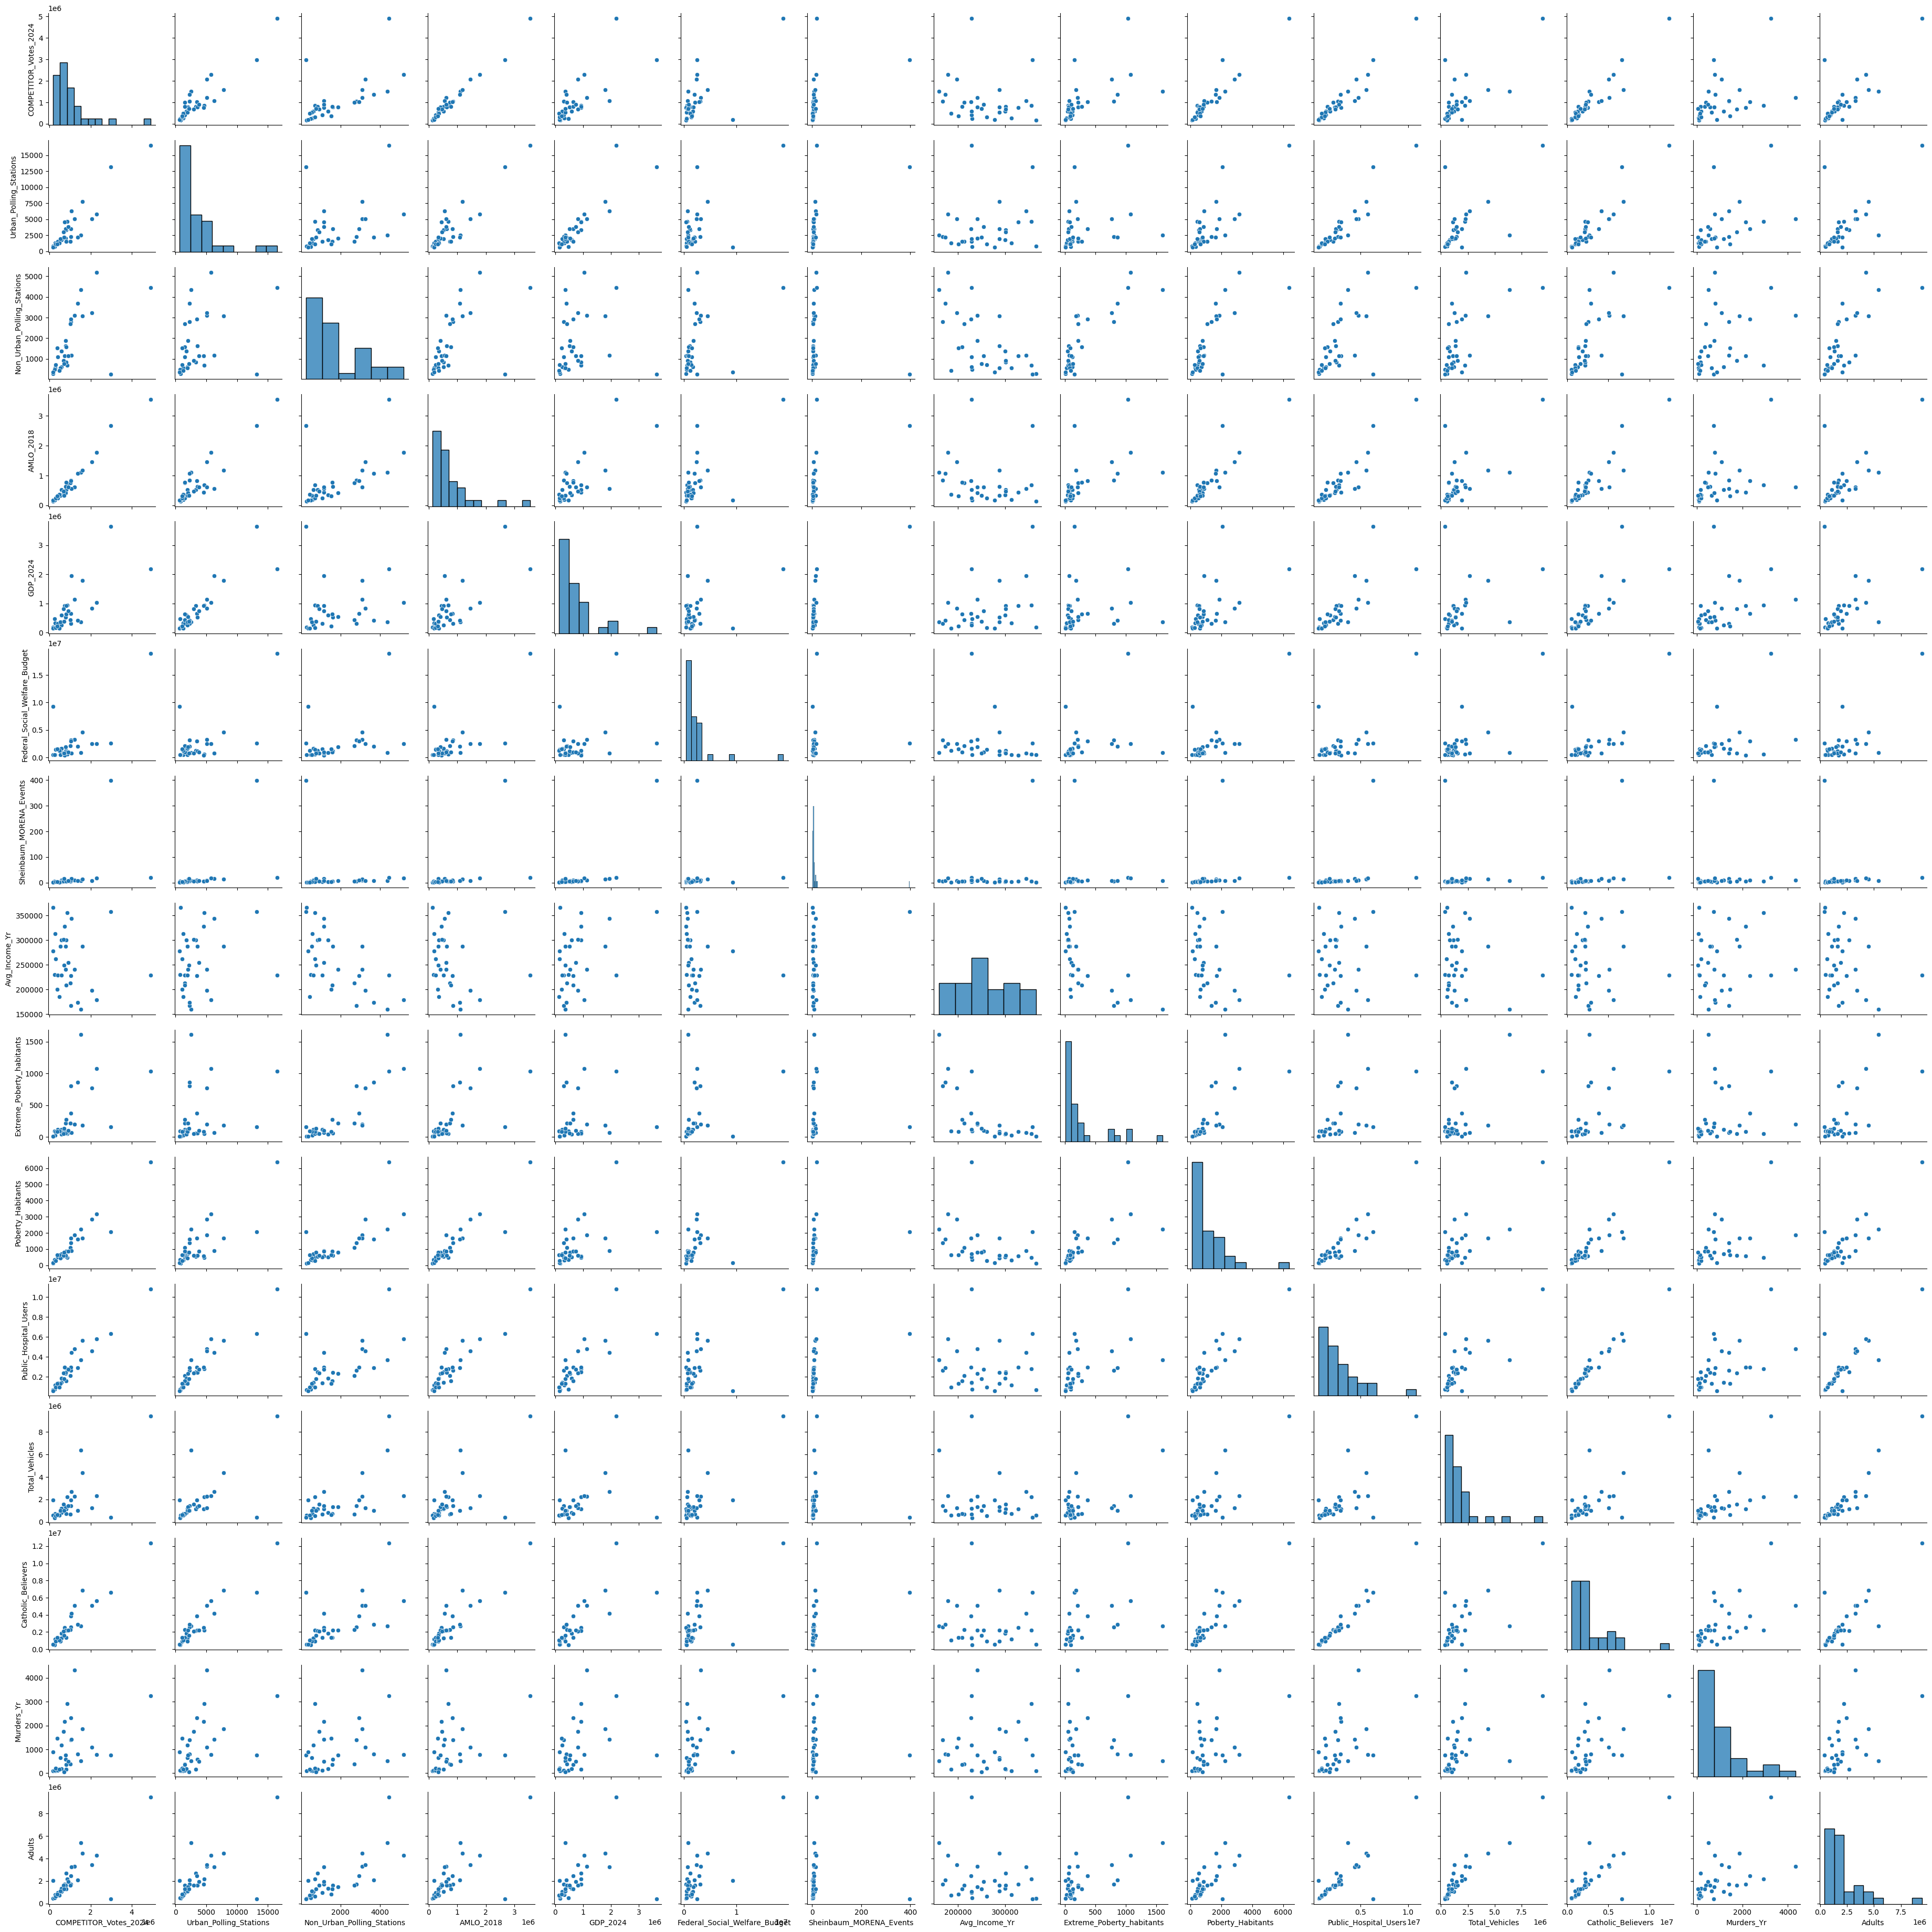

In [48]:
# Pairplot of the dataframe
print("\nPairplot of the dataframe:")
sns.pairplot(numeric_df)
plt.show()

### Quantitative Visualization

Now lets try to see the votes per state in a more visual way, per state...

In [49]:
df.columns

Index(['ENTIDAD', 'COMPETITOR_Votes_2024', 'Xochitl_Opposition_Votes',
       'Maynez_Independant_Votes', 'Null_Votes', 'Urban_Polling_Stations',
       'Non_Urban_Polling_Stations', 'AMLO_2018', 'GDP_1988', 'GDP_1994',
       'GDP_2000', 'GDP_2006', 'GDP_2012', 'GDP_2018', 'GDP_2024',
       'Federal_Social_Welfare_Budget', 'Welfare_Recipents',
       'Sheinbaum_MORENA_Events', 'Xochitl_Opposition_Events',
       'Maynez_Independant_Events', 'Average_Schooling_Years', 'Avg_Income_Yr',
       'Avg_Expense_Yr', 'Extreme_Poberty_habitants', 'Poberty_Habitants',
       'Private_Hospital_Users', 'Public_Hospital_Users', 'Total_Vehicles',
       'Catholic_Believers', 'Murders_Yr', 'Median_Age', 'Children',
       'Teenagers', 'Adults', 'Elders', 'Total_Population', 'Total_GDP'],
      dtype='object')

I want to sort it from higher votes to lower votes to make it look more like a PARETO Graph, and to help the Oposition party to prioritize resources and focus


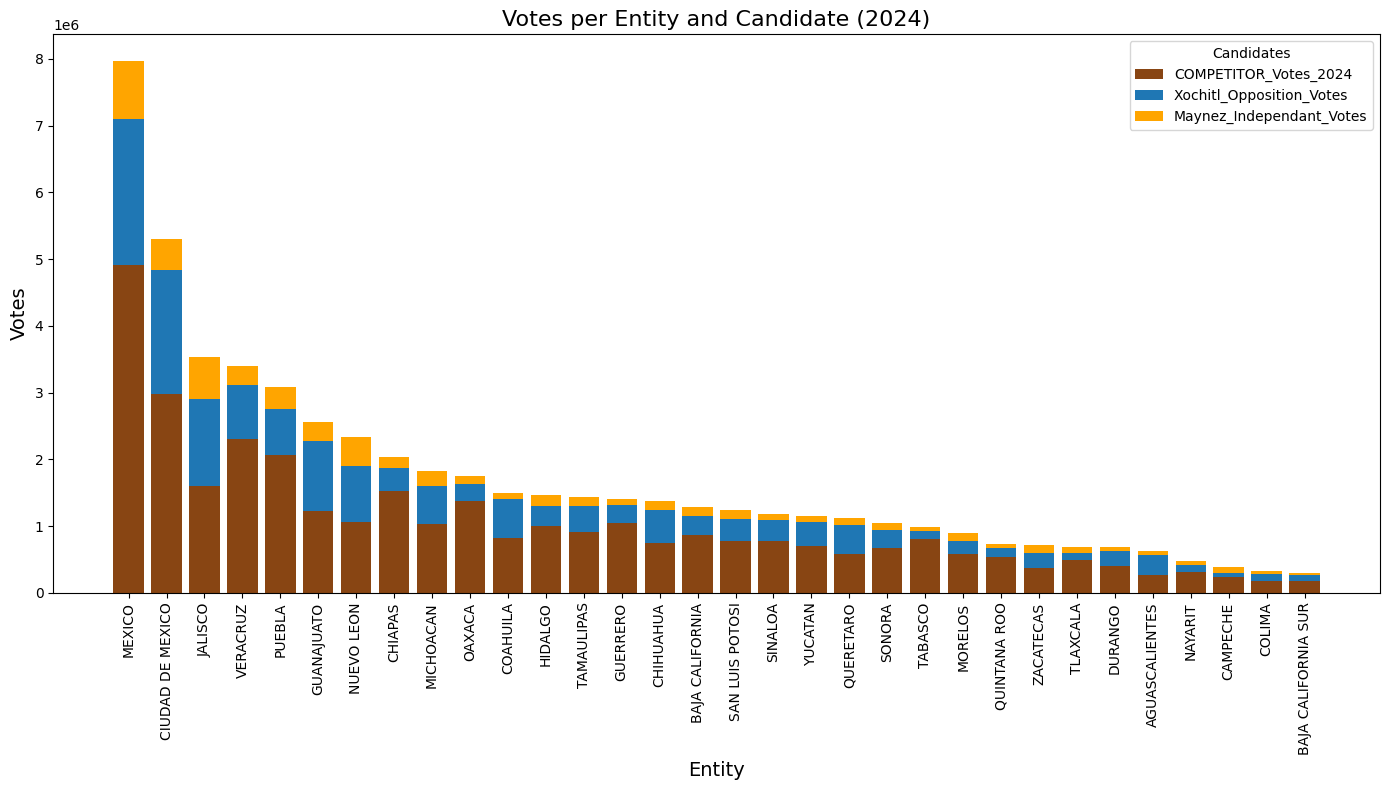

In [51]:
# Filter the relevant columns for plotting
votes_columns = ['COMPETITOR_Votes_2024', 'Xochitl_Opposition_Votes', 'Maynez_Independant_Votes']
df['Total_Votes'] = df[votes_columns].sum(axis=1)

# Sort the dataframe by total votes
df_sorted = df.sort_values(by='Total_Votes', ascending=False)

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(14, 8))

# Plot the stacked bar graph
bottom = [0] * len(df_sorted)
colors = ['#884513', '#1f77b4', '#FFA500']  # Colors for each candidate: Claudia (brown), Xochitl (light blue), Maynez (orange)

for i, candidate in enumerate(votes_columns):
    ax.bar(df_sorted['ENTIDAD'], df_sorted[candidate], bottom=bottom, label=candidate, color=colors[i])
    bottom = [x + y for x, y in zip(bottom, df_sorted[candidate])]

# Add title and labels
ax.set_title('Votes per Entity and Candidate (2024)', fontsize=16)
ax.set_xlabel('Entity', fontsize=14)
ax.set_ylabel('Votes', fontsize=14)

# Set ticks and labels
ax.set_xticks(range(len(df_sorted)))
ax.set_xticklabels(df_sorted['ENTIDAD'], rotation=90)

# Add legend
ax.legend(title='Candidates')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


# Graphical Summary of Where the performance of the 3 parties per state 

Now I will try to make more clear where a stronger resistance can be observed from Opposition

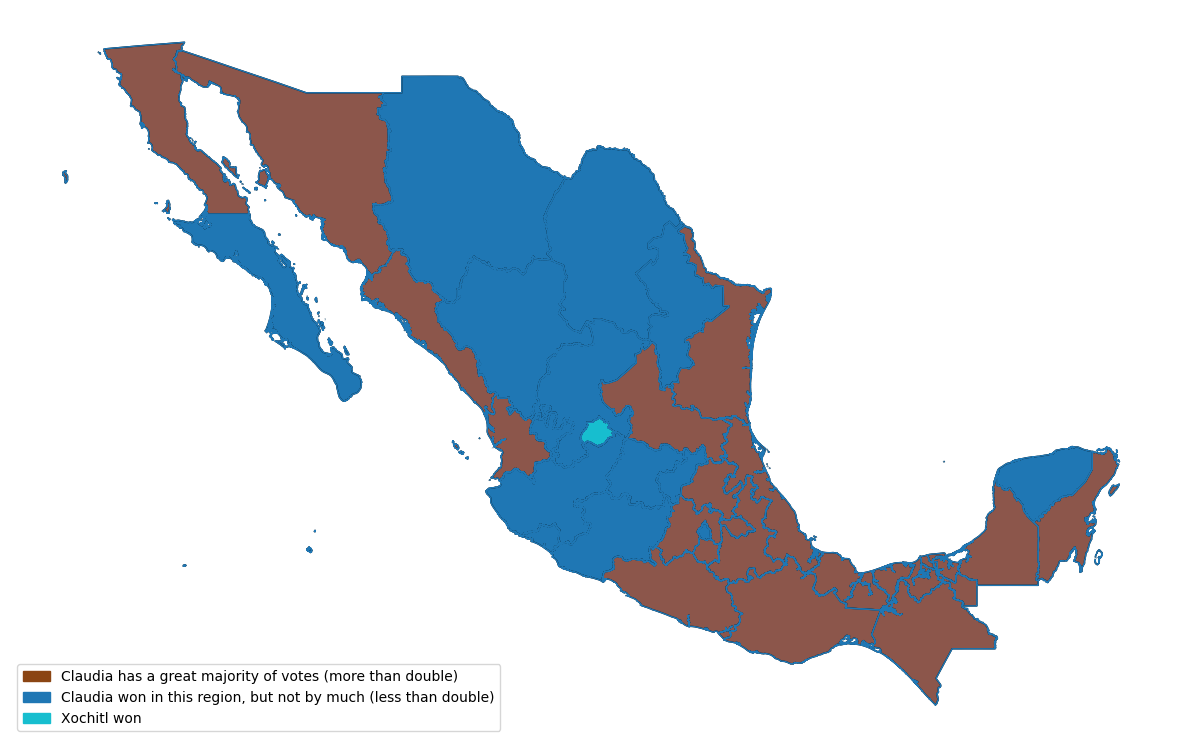

In [56]:
# Load the shapefile of Mexico
mexico_shapefile_path = './dest_2010gw/dest_2010gw.shp'
mexico = gpd.read_file(mexico_shapefile_path)

# Normalize and map the entity names in the shapefile
entity_mapping = {
    'BAJA CALIFORNIA': 'BAJA CALIFORNIA',
    'SONORA': 'SONORA',
    'CHIHUAHUA': 'CHIHUAHUA',
    'COAHUILA DE ZARAGOZA': 'COAHUILA',
    'BAJA CALIFORNIA SUR': 'BAJA CALIFORNIA SUR',
    'NUEVO LEON': 'NUEVO LEON',
    'TAMAULIPAS': 'TAMAULIPAS',
    'SINALOA': 'SINALOA',
    'DURANGO': 'DURANGO',
    'ZACATECAS': 'ZACATECAS',
    'SAN LUIS POTOSI': 'SAN LUIS POTOSI',
    'NAYARIT': 'NAYARIT',
    'JALISCO': 'JALISCO',
    'VERACRUZ DE IGNACIO DE LA LLAVE': 'VERACRUZ',
    'AGUASCALIENTES': 'AGUASCALIENTES',
    'QUINTANA ROO': 'QUINTANA ROO',
    'YUCATAN': 'YUCATAN',
    'GUANAJUATO': 'GUANAJUATO',
    'QUERETARO DE ARTEAGA': 'QUERETARO',
    'CAMPECHE': 'CAMPECHE',
    'HIDALGO': 'HIDALGO',
    'PUEBLA': 'PUEBLA',
    'MICHOACAN DE OCAMPO': 'MICHOACAN',
    'MEXICO': 'MEXICO',
    'TLAXCALA': 'TLAXCALA',
    'DISTRITO FEDERAL': 'CIUDAD DE MEXICO',
    'COLIMA': 'COLIMA',
    'MORELOS': 'MORELOS',
    'TABASCO': 'TABASCO',
    'GUERRERO': 'GUERRERO',
    'OAXACA': 'OAXACA',
    'CHIAPAS': 'CHIAPAS'
}
mexico['ENTIDAD'] = mexico['ENTIDAD'].apply(unidecode).str.upper().replace(entity_mapping)

# Load the subset of votes data
file_path = 'ELECTIONS_vs_SOCIODEMOGRAPHICS_ALT2.csv'
sub_data = pd.read_csv(file_path)

# Normalize the entity names in the subset
sub_data['ENTIDAD'] = sub_data['ENTIDAD'].apply(unidecode).str.upper()

# Create a column for the winner in each state
sub_data['Claudia_Votes'] = sub_data['COMPETITOR_Votes_2024']
sub_data['Xochitl_Votes'] = sub_data['Xochitl_Opposition_Votes']

# Create conditions to assign colors
def assign_color(row):
    if row['Claudia_Votes'] >= 2 * row['Xochitl_Votes']:
        return '#1f77b4'  # Strong blue for Claudia won by double or more
    elif row['Claudia_Votes'] > row['Xochitl_Votes']:
        return '#17becf'  # Light blue for Claudia won by less than double
    else:
        return '#8B4513'  # Brown for Xochitl won

sub_data['color'] = sub_data.apply(assign_color, axis=1)

# Merge the data with the shapefile of Mexico
mexico = mexico.merge(sub_data[['ENTIDAD', 'color']], on='ENTIDAD', how='left')

# Create the simplified plot
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
mexico.boundary.plot(ax=ax, linewidth=1)
mexico.plot(column='color', ax=ax, legend=False, edgecolor='black')

# Customize the legend
legend_patches = [
    mpatches.Patch(color='#8B4513', label='Claudia has a great majority of votes (more than double)'),
    mpatches.Patch(color='#1f77b4', label='Claudia won in this region, but not by much (less than double)'),
    mpatches.Patch(color='#17becf', label='Xochitl won')
]

ax.legend(handles=legend_patches, loc='lower left')

# Remove the axes
ax.set_axis_off()

plt.show()


In this map I see an interesting trend where the higher resistance (Dark blue and light blue) is shown in the center of the country (From north to south).
This Geographical area is well known as the "BAJIO AREA" which is the highest industrial and economical backbone of Mexico!

Interesting enough because the Votes for MORENA (Competitor Party) seem to have Great Correlation with Poberty ratios.

Current President of MORENA says a lot in his speaches 'The poors go FIRST'(Primero los POBRES)... which now has a lot of sense due to the popularity he is gaining in those geo-economical sectors


## Conclusion

In our comprehensive exploratory data analysis (EDA) of the 2024 election data and socio-demographic factors, we gained several valuable insights:

1. **Vote Distribution**: The stacked column graph highlighted how votes were distributed across entities and candidates, with a clear visual representation of each candidate's support base. This visualization made it evident that certain entities had a significantly higher voter turnout for the main competitors, Claudia and Xochitl, compared to Maynez.

2. **Significant Correlations**: Our correlation matrix and scatter plots revealed strong relationships between various socio-economic factors and the number of votes. For instance, there was a notable correlation between average income and votes, indicating that wealthier entities tended to have higher voter turnout for Opposition. Additionally, the relationship between public and private hospital users and votes suggested healthcare access as a potential influencer in voting patterns.

3. **Political Events and Economic Size**: By focusing on the competitor's events, we observed that Claudia and Xochitl's campaign events were more frequent in economically larger entities. This indicates a strategic prioritization of wealthier regions, possibly to maximize their political impact and voter engagement.

4. **Demographic Insights**: Box plots comparing demographic features like children, teenagers, adults, and elders against votes provided a nuanced understanding of how age distribution within entities might influence voting behavior. The linear correlation between adults and teenagers, and the decision to focus on elders, highlighted the significant role these age groups play in the voting process.

5. **Visual Patterns**: The various scatter plots, box plots, and pair plots we created helped us identify patterns, providing a clearer picture of the underlying factors influencing the 2024 election outcomes.

Overall, our EDA not only provided a detailed overview of the voting landscape but also offered strategic insights into how socio-economic and demographic factors intertwine with political events and voter turnout. These findings can serve as a foundation for more targeted campaign strategies and better understanding of voter behavior in future elections.
